<h2>2<sup>η</sup> ΕΡΓΑΣΤΗΡΙΑΚΗ ΑΣΚΗΣΗ</h2>
<h3>Ανάλυση Κοινωνικής Δομής σε Τεχνητές και Πραγματικές Σύνθετες Τοπολογίες Δικτύων</h3>

## **Γεώργιος Τζουμανέκας (ΑΜ: 03118095)**

<p style=text-align:justify>Στην παρούσα άσκηση θα αναλυθούν τεχνητές και πραγματικές τοπολογίες σύνθετων δικτύων με βάση τις μετρικές που χρησιμοποιήθηκαν στην προηγούμενη άσκηση και κάποιες τεχνικές που έχουν ως στόχο την εύρεση κοινωνικής δομής. Συγκεκριμένα, θα χρησιμοποιηθούν και θα συγκριθούν διάφοροι αλγόριθμοι εντοπισμού κοινοτήτων σε γράφους δικτύων που προκύπτουν από πραγματικά δεδομένα καθώς και στους συνθετικούς γράφους της πρώτης εργαστηριακής άσκησης.</p>

In [ ]:
%matplotlib inline

import matplotlib
import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from sklearn.cluster import SpectralClustering

<h3>Α. Μελέτη πραγματικών τοπολογιών</h3>
<p style=text-align:justify>Στο παρόν ερώτημα θα μελετήσετε και θα αποκτήσετε αίσθηση της τοπολογικής δομής πραγματικών δικτύων. Πιο συγκεκριμένα, για τις τοπολογίες που φαίνονται στον <b>πίνακα 1</b>, να βρεθούν και να δειχθούν:</p>
<ol>
    <li>Η κατανομή του βαθμού κόμβου και ο μέσος βαθμός κάθε τοπολογίας.</li>
    <li>Η κατανομή του συντελεστή ομαδοποίησης κόμβου και ο μέσος συντελεστής ομαδοποίησης κάθε τοπολογίας.</li>
    <li>Η κατανομή της κεντρικότητας εγγύτητας και η μέση κεντρικότητα εγγύτητας κάθε τοπολογίας.</li>
</ol>
<p style=text-align:justify>Να συγκριθούν τα αποτελέσματα σε σχέση με αυτά των συνθετικών τοπολογιών. Να χαρακτηρίσετε τον τύπο κάθε μίας από τις πραγματικές τοπολογίες με βάση τους τύπους δικτύων που εξετάστηκαν στην πρώτη εργαστηριακή άσκηση.</p>

<table style=width:100%>
    <caption>Πίνακας <b>1</b>: Πραγματικές τοπολογίες</a></caption>
<tr>
    <th style=text-align:left>Τοπολογία</th>
    <th style=text-align:left>Αρχείο</th>
    <th style=text-align:left>Περιγραφή</th>
</tr>
<tr>
    <td style=text-align:left>American College Football</td>
    <td style=text-align:left><a style=text-decoration:none href='http://www-personal.umich.edu/~mejn/netdata/football.zip'>football.gml</a></td>
    <td style=text-align:left><p style=text-align:justify> The file <b>football.gml</b> contains the network of American football games between Division IA colleges during regular season Fall 2000, as compiled by M. Girvan and M. Newman. The nodes have values that indicate to which conferences they belong.</p>
    </td>
</tr>  
<tr>
    <td style=text-align:left>Game of Thrones - season 5</td>
    <td style=text-align:left><a style=text-decoration:none href='https://networkofthrones.wordpress.com/the-series/season-5/'>GoT</a></td>
    <td style=text-align:left><p style=text-align:justify> The season 5 <b>GoT</b> network represents the interactions between the characters of Game of Thrones in season 5. The season 5 network has 118 nodes (characters) and 394 weighted edges, corresponding to 5,139 interactions. Data can be found here: <a style=text-decoration:none href='https://raw.githubusercontent.com/mathbeveridge/gameofthrones/master/data/got-s5-edges.csv'>GoT_data</a></p>
</tr> 
<tr>
    <td style=text-align:left>email-Eu-core</td>
    <td style=text-align:left><a style=text-decoration:none href='https://snap.stanford.edu/data/email-Eu-core.html'>email-eu-core</a></td>
    <td style=text-align:left><p style=text-align:justify> The network <b>email-Eu-core</b> was generated using email data from a large European research institution. There is an edge (u, v) in the network if person u sent person v at least one email. The e-mails only represent communication between institution members (the core) and the dataset does not contain incoming messages from or outgoing messages to the rest of the world. The dataset also contains "ground-truth" community memberships of the nodes. Each individual belongs to exactly one of 42 departments at the research institute. </p>
</tr> 
    
</table>

<h4>Παραγωγή συνθετικών τοπολογιών</h4> 
<p>Προσοχή! Τα δίκτυα που θα παράξετε θα πρέπει να είναι συνδεδεμένα.</p>

In [ ]:
n=80
d=4
M=300
R=0.25
p=0.3
k=4
seedno=5
random.seed(seedno)

REG = nx.watts_strogatz_graph(n, d, 0, seed = None)
RGER = nx.gnm_random_graph(n, M, seed=None)
RGG = nx.random_geometric_graph(n, R, seed=None)
SF = nx.barabasi_albert_graph(n, d, seed=None)
SW = nx.watts_strogatz_graph(n, d, p, seed = None)

Ελέγχουμε αν είναι συνδεδεμένα τα δίκτυα:

In [ ]:
print("Is the REG network connected?",nx.is_connected(REG))
print("Is the RGER network connected?",nx.is_connected(RGER))
print("Is the RGG network connected?",nx.is_connected(RGG))
print("Is the SF network connected?",nx.is_connected(SF))
print("Is the SW network connected?",nx.is_connected(SW))

Is the REG network connected? True
Is the RGER network connected? True
Is the RGG network connected? True
Is the SF network connected? True
Is the SW network connected? True


<h4>Εισαγωγή και οπτικοποίηση πραγματικών τοπολογιών.</h4>

Θα εισάγουμε το κάθε δίκτυο από το κάθε αρχείο και αφού ελέγξουμε την συνδεσιμότητα του θα το οπτικοποιήσουμε.

<font color="magenda">**football**</font>

In [ ]:
#football network
football=nx.read_gml(r"football.gml")

In [ ]:
print("Is the football network connected?", nx.is_connected(football))

Is the football network connected? True


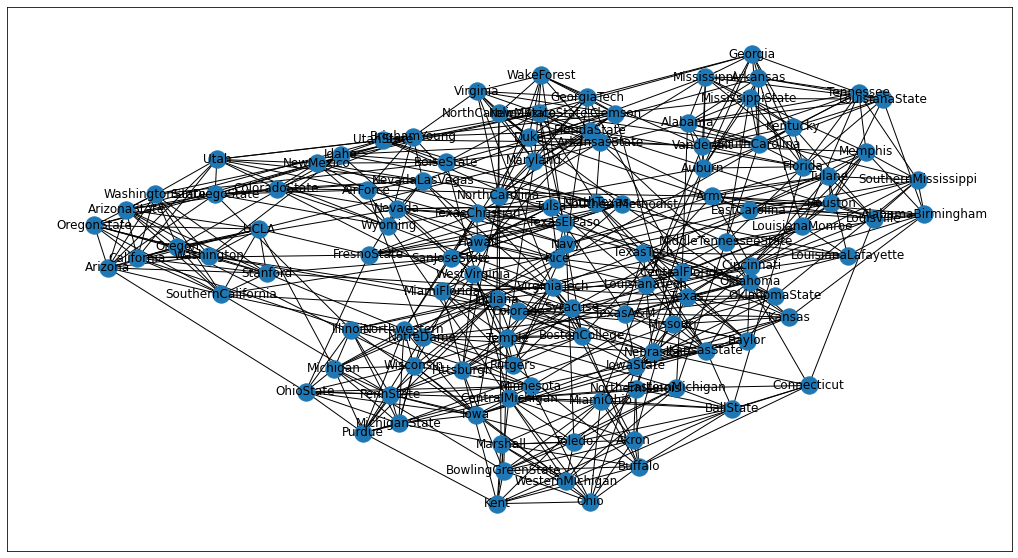

In [ ]:
plt.figure(figsize=(18,10))
nx.draw_networkx(football, font_size=12)
plt.show()

<font color="magenda">**Game of Thrones**</font>

In [ ]:
#Game of thrones network
import csv
got=nx.Graph()
with open('got_s5.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    next(csv_reader)
    for row in csv_reader:
        got.add_edge(row[0],row[1])
        line_count += 1

In [ ]:
print("Is the got network connected?", nx.is_connected(got))

Is the got network connected? True


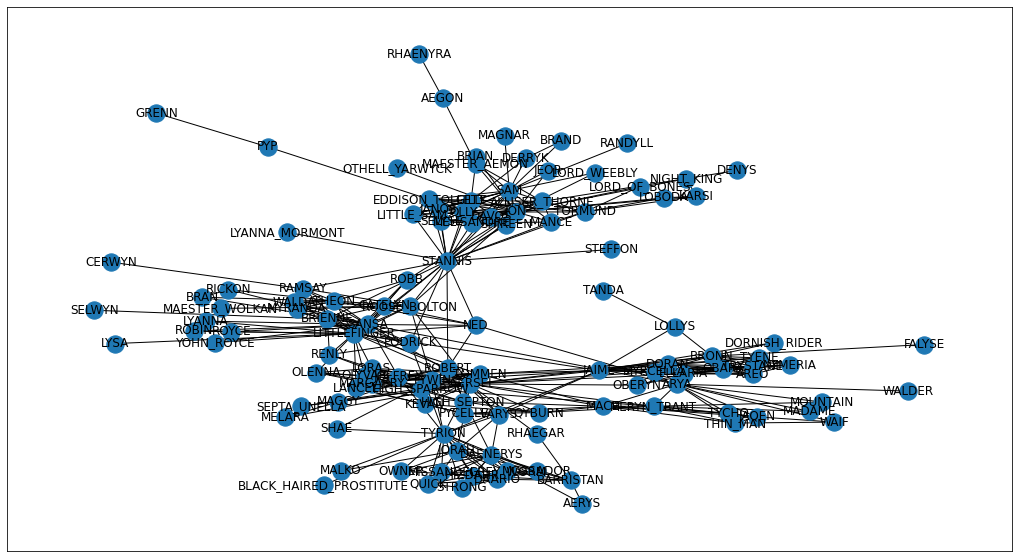

In [ ]:
plt.figure(figsize=(18,10))
nx.draw_networkx(got, font_size=12)
plt.show()

#### Προσοχή! Θα μελετήσετε τη μεγαλύτερη συνδεδεμένη συνιστώσα του δικτύου email-Eu-core, αφού πρώτα αφαιρέσετε τα self-loops. Μπορείτε να κάνετε χρήση των συναρτήσεων connected_components, subgraph, remove_edges_from του networkx.

<font color="magenda">**email-Eu-core**</font>

In [ ]:
#email-Eu-core network
eu=nx.read_edgelist("email-Eu-core.txt",create_using=nx.Graph())

In [ ]:
print("Is the email-Eu-core network network connected?",nx.is_connected(eu))

Is the email-Eu-core network network connected? False


Παρατηρούμε ότι ο γράφος δεν είναι συνεκτικός ως έχει άρα όπως τονίζεται θα μελετήσουμε την μεγαλύτερη συνδεδεμένη συνιστώσα.

In [ ]:
#remove self loops 
eu.remove_edges_from(nx.selfloop_edges(eu))

#find the maximum connected component
eusorted = sorted(nx.connected_components(eu), key=len, reverse=True)
max_component = max(eusorted)

#make the subgraph
eu_graph = eu.subgraph(max_component)
eu_graph = nx.Graph(eu_graph) #to unfreeze the graph

In [ ]:
print("Is the email-Eu-core network network now connected?",nx.is_connected(eu_graph))

Is the email-Eu-core network network now connected? True


Τώρα ο γράφος είναι συνεκτικός άρα μπορούμε να τον χρησιμοποιήσουμε.

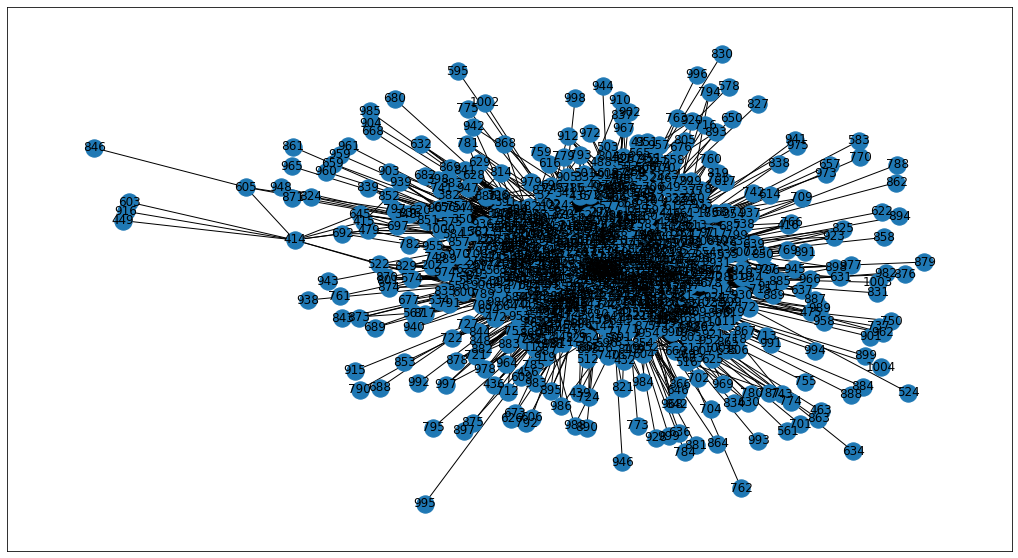

In [ ]:
plt.figure(figsize=(18,10))
nx.draw_networkx(eu_graph, font_size=12)
plt.show()

<h4>Μελέτη βαθμού κόμβου για πραγματικές και συνθετικές τοπολογίες.</h4>

In [ ]:
def mean_degree(G):
  degrees = []
  for n in G.nodes():
    degrees.append(G.degree(n))
  
  return np.mean(degrees)

#αναπαράσταση της κατανομής του βαθμού
def plot_degrees(G):
    degrees = []
    for n in G.nodes():
      degrees.append(G.degree(n))

    plt.figure()
    plt.title('Degree distribution')
    plt.xlabel("Degree")
    plt.ylabel("Number of nodes")
    plt.hist(degrees, bins = 20, edgecolor='black')
    plt.show()

In [ ]:
print("Mean node degree of REG:", mean_degree(REG))
print("Mean node degree of RG(ER):", mean_degree(RGER))
print("Mean node degree of RGG:", mean_degree(RGG))
print("Mean node degree of SF:", mean_degree(SF))
print("Mean node degree of SW:", mean_degree(SW))
print("Mean node degree of American College Football:", mean_degree(football))
print("Mean node degree of Game of Thrones - season 5:", mean_degree(got))
print("Mean node degree of email-Eu-core:", mean_degree(eu_graph))

Mean node degree of REG: 4.0
Mean node degree of RG(ER): 7.5
Mean node degree of RGG: 14.0
Mean node degree of SF: 7.6
Mean node degree of SW: 4.0
Mean node degree of American College Football: 10.660869565217391
Mean node degree of Game of Thrones - season 5: 6.65546218487395
Mean node degree of email-Eu-core: 32.5841784989858


Degree Distribution of REG


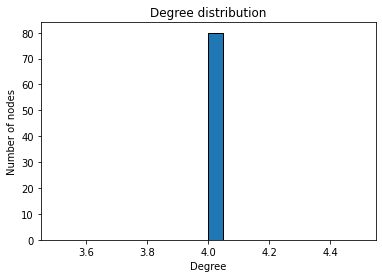



Degree Distribution of RG(ER)


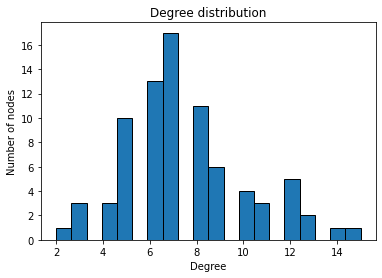



Degree Distribution of RGG


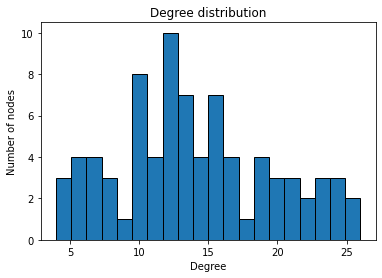



Degree Distribution of SF


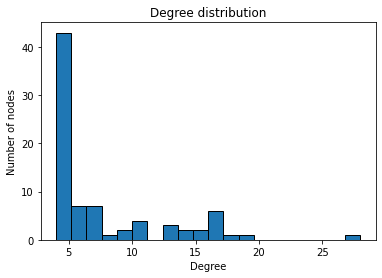



Degree Distribution of SW


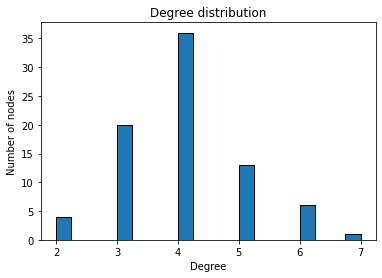



Degree Distribution of American College Football


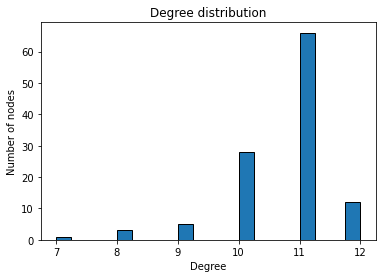



Degree Distribution of Game of Thrones - season 5


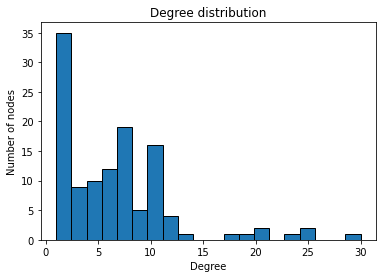



Degree Distribution of email-Eu-core


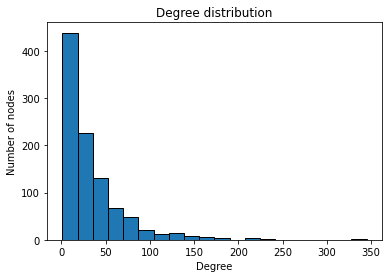

In [ ]:
print("Degree Distribution of REG")
plot_degrees(REG)
print("\n")
print("Degree Distribution of RG(ER)")
plot_degrees(RGER)
print("\n")
print("Degree Distribution of RGG")
plot_degrees(RGG)
print("\n")
print("Degree Distribution of SF")
plot_degrees(SF)
print("\n")
print("Degree Distribution of SW")
plot_degrees(SW)
print("\n")
print("Degree Distribution of American College Football")
plot_degrees(football)
print("\n")
print("Degree Distribution of Game of Thrones - season 5")
plot_degrees(got)
print("\n")
print("Degree Distribution of email-Eu-core")
plot_degrees(eu_graph)

<font color="orange">**Σχολιασμός**</font>
* Για το δίκτυο **football** παρατηρούμε ότι η μέση τιμή του βαθμού των κόμβων είναι πιο κοντά στο δίκτυο RGG, αλλά η κατανομή του μοιάζει με την κατανομή του SW δικτύου. Η μέση τιμή βαθμού ωστόσο δεν είναι καλό μέτρο σύγκρισης μεταξύ τοπολογιών μιας και το εκάστοτε δίκτυο έχει διαφορετικό πλήθος κόμβων.

* Το δίκτυο **got** έχει τιμή μέσου βαθμού κοντά στο RGER και το SF ενώ η κατανομή του βαθμού μοιάζει ελαφρώς με αυτή του SF αφού έχουμε πολλούς κόμβους με πιο μικρό βαθμό και πιο λίγους κόμβους με μεγαλύτερο βαθμό.

* Το δίκτυο **Email-Eu-core** βλέπουμε ότι πάλι η κατανομή μοιάζει με την τοπολογία SF, ωστόσο ο μέσος βαθμός έχει πολύ μεγαλύτερη τιμή από αυτή του SF.

<h4>Μελέτη συντελεστή ομαδοποίησης για πραγματικές και συνθετικές τοπολογίες</h4>

In [ ]:
# χρησιμοποιούμε την συνάρτηση του networkx που εμφανίζει για κάθε κόμβο το συντελεστή ομαδοποίησης
def cc(G):
    return(nx.clustering(G))

def mean_cc(G):
  return np.mean(list(cc(G).values()))

#αναπαράσταση της κατανομής του συντελεστή ομαδοποίησης
def plot_cc(topology):
    X = np.sort(np.array(list(cc(topology).values())))
    Y = np.array(range(n))/float(n)
    plt.figure()
    plt.title("Clustering coefficient distribution")
    plt.xlabel("Clustering coefficient")
    plt.ylabel("Number of nodes")
    plt.hist(X, Y, edgecolor='black')
    plt.show()

In [ ]:
print("Mean clustering coefficient of REG:", mean_cc(REG))
print("Mean clustering coefficient of RG(ER):", mean_cc(RGER))
print("Mean clustering coefficient of RGG:", mean_cc(RGG))
print("Mean clustering coefficient of SF:", mean_cc(SF))
print("Mean clustering coefficient of SW:", mean_cc(SW))
print("Mean clustering coefficient of American College Football:", mean_cc(football))
print("Mean clustering coefficient of Game of Thrones - season 5:", mean_cc(got))
print("Mean clustering coefficient of email-Eu-core:", mean_cc(eu_graph))

Mean clustering coefficient of REG: 0.5
Mean clustering coefficient of RG(ER): 0.10780871905871905
Mean clustering coefficient of RGG: 0.688913093972927
Mean clustering coefficient of SF: 0.15363123521502003
Mean clustering coefficient of SW: 0.1943452380952381
Mean clustering coefficient of American College Football: 0.40321601104209803
Mean clustering coefficient of Game of Thrones - season 5: 0.5744036387164707
Mean clustering coefficient of email-Eu-core: 0.4070504475195386


Clustering Coefficient Distribution of REG


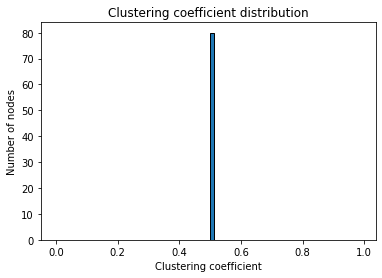



Clustering Coefficient Distribution of RG(ER)


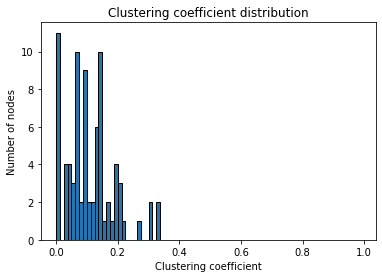



Clustering Coefficient Distribution of RGG


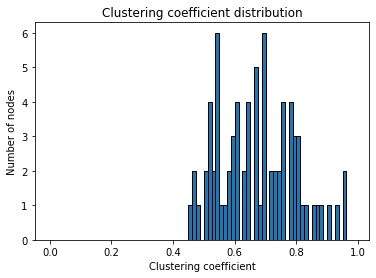



Clustering Coefficient Distribution of SF


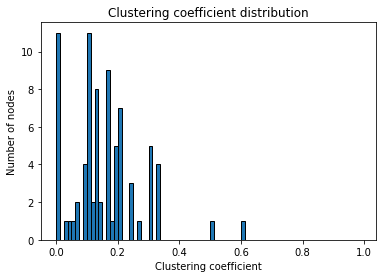



Clustering Coefficient Distribution of SW


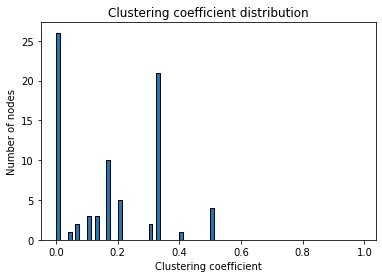



Clustering Coefficient Distribution of American College Football


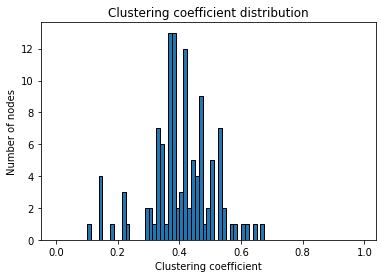



Clustering Coefficient Distribution of Game of Thrones - season 5


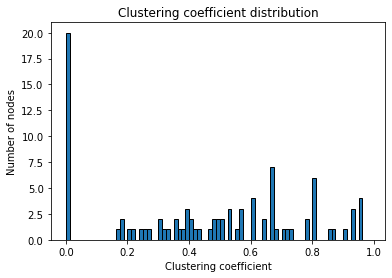



Clustering Coefficient Distribution of email-Eu-core


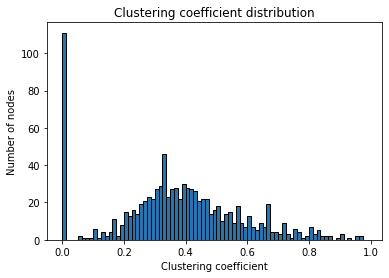

In [ ]:
print("Clustering Coefficient Distribution of REG")
plot_cc(REG)
print("\n")
print("Clustering Coefficient Distribution of RG(ER)")
plot_cc(RGER)
print("\n")
print("Clustering Coefficient Distribution of RGG")
plot_cc(RGG)
print("\n")
print("Clustering Coefficient Distribution of SF")
plot_cc(SF)
print("\n")
print("Clustering Coefficient Distribution of SW")
plot_cc(SW)
print("\n")
print("Clustering Coefficient Distribution of American College Football")
plot_cc(football)
print("\n")
print("Clustering Coefficient Distribution of Game of Thrones - season 5")
plot_cc(got)
print("\n")
print("Clustering Coefficient Distribution of email-Eu-core")
plot_cc(eu_graph)

<font color="orange">**Σχολιασμός**</font>
* Όσον αφορά το **football** βλέπουμε ότι έχει μέσο συντελεστή ομαδοποίησης κοντά στο δίκτυο REG αλλά η κατανομή του δεν είναι σταθερή όπως του REG αλλά είναι πιο κοντά στην κατανομή του RGG και του RGER.

* Το δίκτυο **got** έχει μέσο συντελεστή ομαδοποίησης κοντά στο RGG αλλά η κατανομή του μοιάζει ελαφρώς με την κατανομή του δικτύου SF ή του SW, επειδή έχει πολλόυς κόμοβους με μηδενικό συντελεστή ομαδοποίησης και μερικούς με μεγαλύτερες τιμές.

* Για το δίκτυο **Email-Eu-core** παρατηρούμε ότι έχει κατανομή που μοιάζει με του SF και του SW. Το γεγονός ότι έχει μεγάλες τιμές συντελεστή ομαδοποίησης μας υποψιάζει ότι θα μπορούσε να είναι small world μιας και είναι ένα εγγενές χαρακτηριστικό αυτών των δικτύων, άρα θα μπορούσε να είναι SF ή SW.

<h4>Μελέτη κεντρικότητας εγγύτητας για πραγματικές και συνθετικές τοπολογίες </h4>

In [ ]:
def find_closeness(G):
    return nx.closeness_centrality(G)

def mean_closeness(G):
    return np.mean(list(find_closeness(G).values()))

def plot_closeness_centrality(G):
    x = list(find_closeness(G).values())
    closeness = []
    for i in x:
      closeness.append(i) 
    plt.hist(closeness, bins = 20, edgecolor='black')
    plt.show()

In [ ]:
print("Mean closeness centrality of REG:", mean_closeness(REG))
print("Mean closeness centrality of RG(ER):", mean_closeness(RGER))
print("Mean closeness centrality of RGG:", mean_closeness(RGG))
print("Mean closeness centrality of SF:", mean_closeness(SF))
print("Mean closeness centrality of SW:", mean_closeness(SW))
print("Mean closeness centrality of American College Football:", mean_closeness(football))
print("Mean closeness centrality of Game of Thrones - season 5:", mean_closeness(got))
print("Mean closeness centrality of email-Eu-core:", mean_closeness(eu_graph))

Mean closeness centrality of REG: 0.09634146341463413
Mean closeness centrality of RG(ER): 0.42475897842852933
Mean closeness centrality of RGG: 0.36365115947647253
Mean closeness centrality of SF: 0.4386021576757619
Mean closeness centrality of SW: 0.2791959454639716
Mean closeness centrality of American College Football: 0.39931907825186225
Mean closeness centrality of Game of Thrones - season 5: 0.31905170483140755
Mean closeness centrality of email-Eu-core: 0.39446404120869627


Closeness centrality Distribution of REG


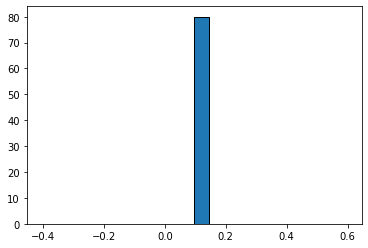



Closeness centrality Distribution of RG(ER)


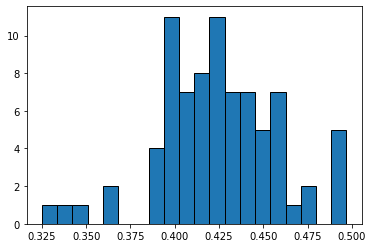



Closeness centrality Distribution of RGG


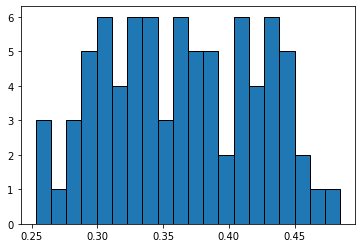



Closeness centrality Distribution of SF


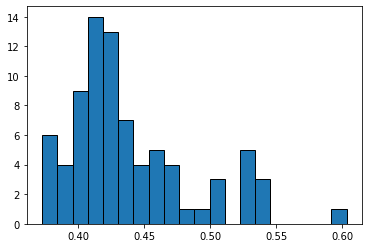



Closeness centrality Distribution of SW


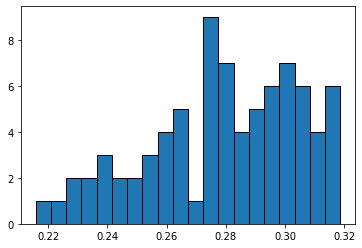



Closeness centrality Distribution of American College Football


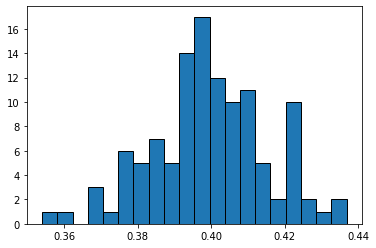



Closeness centrality Distribution of Game of Thrones - season 5


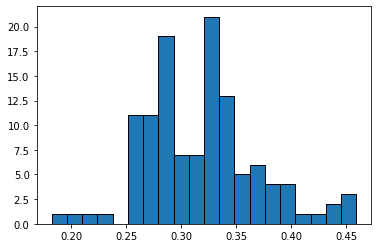



Closeness centrality Distribution of email-Eu-core


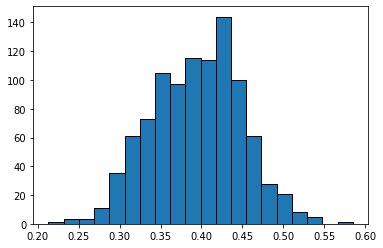

In [ ]:
print("Closeness centrality Distribution of REG")
plot_closeness_centrality(REG)
print("\n")
print("Closeness centrality Distribution of RG(ER)")
plot_closeness_centrality(RGER)
print("\n")
print("Closeness centrality Distribution of RGG")
plot_closeness_centrality(RGG)
print("\n")
print("Closeness centrality Distribution of SF")
plot_closeness_centrality(SF)
print("\n")
print("Closeness centrality Distribution of SW")
plot_closeness_centrality(SW)
print("\n")
print("Closeness centrality Distribution of American College Football")
plot_closeness_centrality(football)
print("\n")
print("Closeness centrality Distribution of Game of Thrones - season 5")
plot_closeness_centrality(got)
print("\n")
print("Closeness centrality Distribution of email-Eu-core")
plot_closeness_centrality(eu_graph)

<font color="orange">**Σχολιασμός**</font>
* Αναφορικά με το δίκτυο **football** βλέπουμε ότι μοιάζει με την τοπολογία RGER τόσο στην κατανομή όσο και στην μέση τιμή της κεντρικότητας εγγύτητας.

* Το δίκτυο **got** έχει μέση τιμή κεντρικότητας εγγύτητας κοντα σε αυτές των RGG και SW τοπολογιών. Η κατανομή του ωστόσο μοιάζει μόνο με αυτή της RGER τοπολογίας.

* Για το δίκτυο **Email-Eu-core** παρατηρούμε ότι η κατανομή μοιάζει περισσότερο με τις τοπολογίες RGER και SF.

<font color="lightgreen">**Τελικά συμπεράσματα**</font>

Από όλα τα παραπάνω συμπεραίνουμε ότι το δίκτυο **football** μοιάζει περισσότερο με την τοπολογία **RGER**, το δίκτυο **got** δεν μοιάζει τόσο με κάποια συγκεκριμένη τοπολογία μιας και σε κάθε μετρική ταιριάζει σε μια διαφορετική, ωστόσο θεωρούμε ότι μοιάζει με την **SF** περισσότερο και τέλος, το δίκτυο **Email-Eu-core** θα θεωρήσουμε ότι είναι τύπου **SF** (ή και SW) που είναι small world δίκτυα.

<h3>B. Εξοικείωση με τα εργαλεία εντοπισμού κοινοτήτων</h3>
<ol>
<li>Χρησιμοποιώντας τις συναρτήσεις του <b>πίνακα 2</b> για κάθε <u>πραγματικό</u> (<b>πίνακας 1</b>) και <u>συνθετικό</u> (από την <b>άσκηση 1</b>) δίκτυο:</p>
<ol>
    <li>να οπτικοποιηθούν οι κοινότητες που προκύπτουν από την κάθε μέθοδο,</li>
    <li>να γίνουν οι απαραίτητοι σχολιασμοί (π.χ: σύγκριση του αριθμού των κοινοτήτων που υπολογίζει ο κάθε αλγόριθμος).</li>
</ol>
<p>Για την οπτικοποίηση, να επισημανθεί διαφορετικά κάθε κοινότητα, π.χ. με διαφορετικό χρώμα.</p>
<p style=text-align:justify>Στην περίπτωση των συνθετικών δικτύων, να πραγματοποιηθούν συγκρίσεις και μεταξύ των διαφορετικών τύπων τοπολογιών. Για παράδειγμα, στην περίπτωση του τυχαίου γεωμετρικού γράφου, υπάρχει διαισθητικά μία κοινότητα γύρω από κάθε κόμβο που δημιουργείται με βάση τις αποστάσεις του τελευταίου από τους υπόλοιπους κόμβους του δικτύου. Στην περίπτωση των scale-free δικτύων, είναι πιθανό να σχηματίζονται κοινότητες γύρω από τους κόμβους με μεγάλο βαθμό.</p>
<li>Για κάθε αλγόριθμο εντοπισμού κοινοτήτων και για κάθε τοπολογία αξιολογήστε την ποιότητα της διαμέρισης με τις μετρικές performance και modularity (<a style=text-decoration:none href='https://networkx.org/documentation/stable/reference/algorithms/community.html#module-networkx.algorithms.community.quality'>measuring_partitions</a>). Για την μετρική performance, θα χρησιμοποιήσετε την συνάρτηση partition_quality του networkx.</li>
<li>Για την μεγαλύτερη συνδεδεμένη συνιστώσα του email-Eu-core, να συγκρίνετε την ground-truth διαμέριση που δίνεται στο αρχείο Email-Eu-core-department-labels.txt με τις διαμερίσεις που προκύπτουν από τις εξεταζόμενες μεθόδους ως προς το πλήθος των παραγόμενων κοινοτήτων και ως προς τις μετρικές performance και modularity. </li>
<li>Για την παρακολούθηση του χρόνου εκτέλεσης της υλοποίησής σας, μπορείτε να χρησιμοποιήσετε τις βιωλιοθήκες <a style=text-decoration:none href='https://tqdm.github.io/'>tqdm</a> και <a style=text-decoration:none href='https://docs.python.org/3/library/time.html'>time</a> . Στο σχολιασμό σας να λάβετε υπόψη το trade-off της ποιότητας της διαμέρισης και του χρόνου εκτέλεσης των εξεταζόμενων αλγορίθμων. </li>
</ol>

<table style=float:left;width:70%>
    <caption>Πίνακας <b>2</b>: Συναρτήσεις εντοπισμού κοινοτήτων</caption>
    <tr>
        <th style=text-align:left> Μέθοδος εντοπισμού κοινοτήτων</th>
        <th style=text-align:left>Συνάρτηση</th>
    </tr>
    <tr>
        <td style=text-align:left>Spectral Clustering</td>
        <td style=text-align:left><a style=text-decoration:none href='http://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html'>SpectralClustering</a></td>
    </tr>
       <tr>
        <td style=text-align:left>Newman-Girvan</td>
        <td style=text-align:left><a style=text-decoration:none                               href='https://networkx.github.io/documentation/latest/reference/algorithms/generated/networkx.algorithms.community.centrality.girvan_newman.html'>girvan_newman</a></td>
    </tr>
    <tr>
        <td style=text-align:left>Modularity Maximization</td>
        <td style=text-align:left><a style=text-decoration:none                               href='https://networkx.github.io/documentation/latest/reference/algorithms/generated/networkx.algorithms.community.modularity_max.greedy_modularity_communities.html'>greedy_modularity_communities</a></td>
    </tr>
</table>
    

<p style=text-align:justify>Προτού εφαρμόσετε τις συναρτήσεις εντοπισμού κοινοτήτων μελετήστε προσεκτικά την <b>είσοδο που απαιτούν καθώς και τη μορφή εξόδου που παράγουν.</b></p>

In [ ]:
#Χρησιμοποιήστε την συνάρτηση conv2int για να μετατρέψετε τα labels των κόμβων στις πραγματικές τοπολογίες σε integers
def conv2int(G,start_value):
    nG = nx.convert_node_labels_to_integers(G,first_label=start_value)
    G_mapping=dict(enumerate(G.nodes,0))
    return nG,G_mapping

Επειδή τα labels των κόμβων των δικτύων είναι strings και όχι ints, αρχικά τα μετατρέπουμε σε ints με χρήση της συνάρτησης conv2int που μας δίνεται:

In [ ]:
nfootball,football_map = conv2int(football,0)
ngot, got_map = conv2int(got,0)
neu, eu_map = conv2int(eu_graph,0)

Οπτικοποιούμε ξανά τα δίκτυα για να δούμε την αλλαγή στους κόμβους.

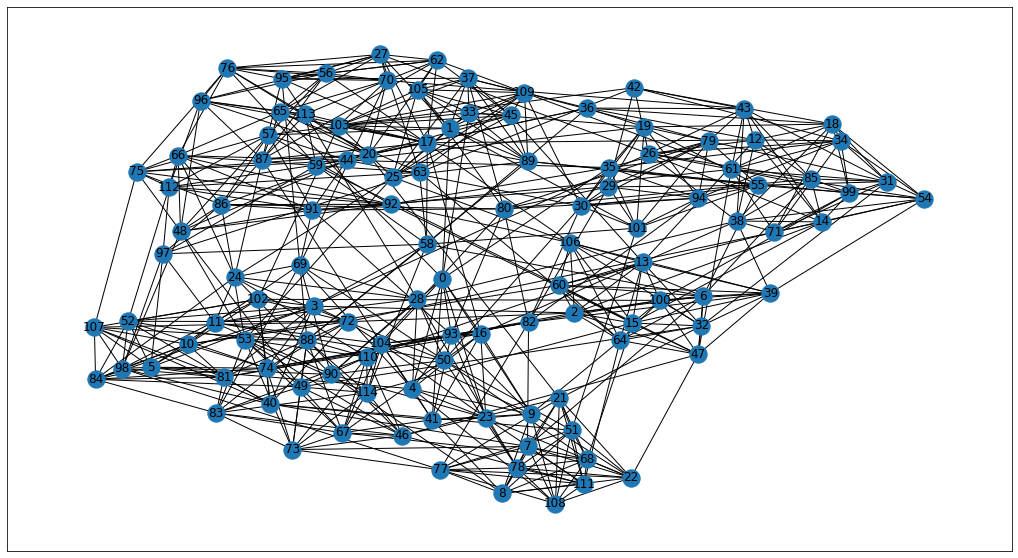

In [ ]:
plt.figure(figsize=(18,10))
nx.draw_networkx(nfootball, font_size=12)
plt.show()

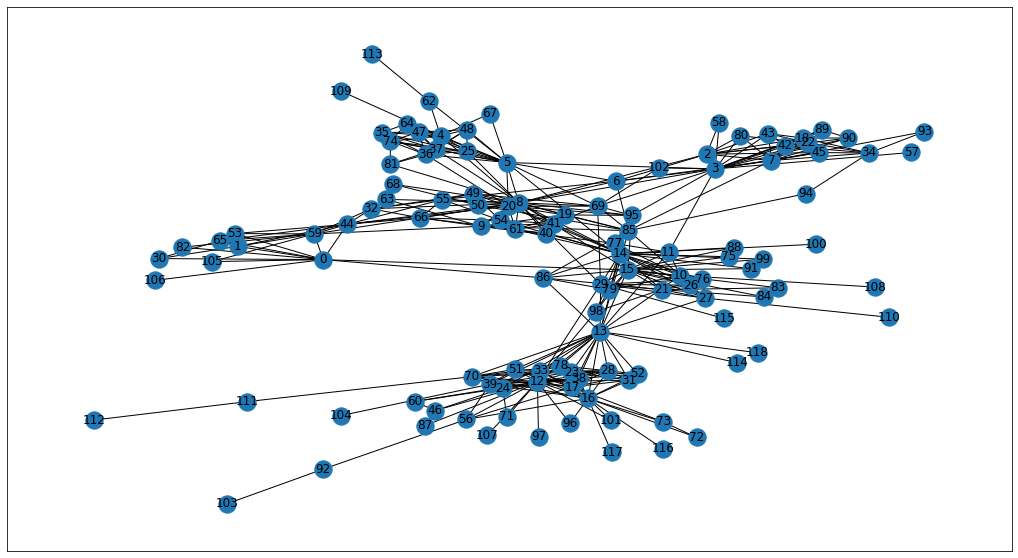

In [ ]:
plt.figure(figsize=(18,10))
nx.draw_networkx(ngot, font_size=12)
plt.show()

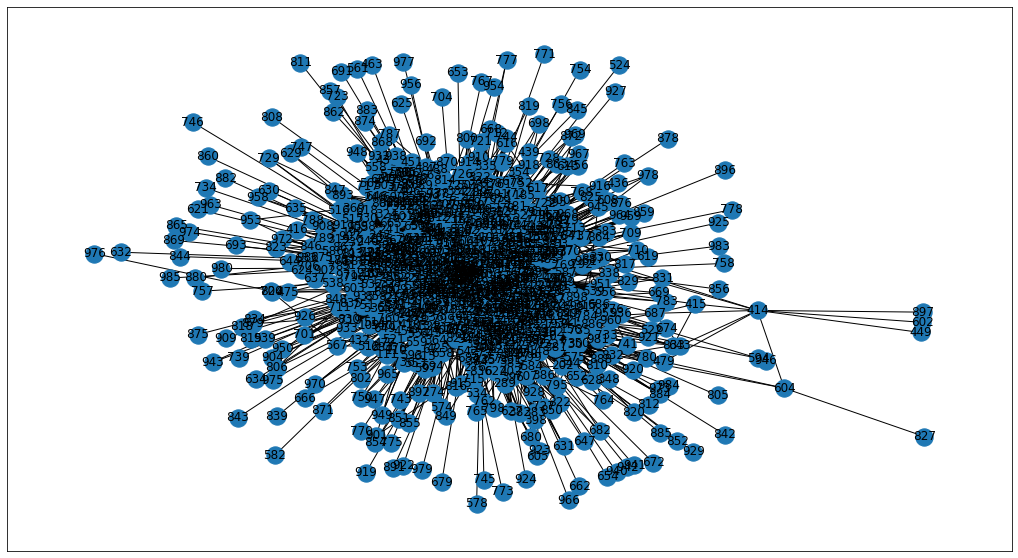

In [ ]:
plt.figure(figsize=(18,10))
nx.draw_networkx(neu, font_size=12)
plt.show()

<h4> Ορισμός χρωμάτων για την οπτικοποίηση των κοινοτήτων.</h4>

In [ ]:
#insert colors for nodes
from matplotlib import colors as mcolors
colors = list(dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS).keys())

In [ ]:
#load of the libraries we'll need
from tqdm import tqdm
import time

<h4>Εντοπισμός κοινοτήτων σε συνθετικά και πραγματικά δίκτυα με τη μέθοδο Newman-Girvan.</h4>
<p>Παράξτε τις διαμερίσεις που προκύπτουν από την μέθοδο Newman-Girvan. Ελέγξτε τις διαμερίσεις που έχουν μέχρι και 50 κοινότητες.</p> 
<p> Επιλέξτε τις διαμερίσεις με το 1) μεγαλύτερο modularity score και 2) performance score για κάθε πραγματικό και συνθετικό δίκτυο.</p>



---


Ο αλγόριθμος **Newman-Girvan** εντοπίζει τις κοινότητες σε μία τοπολογία αφαιρώντας ακμές με την υψηλότερη τιμή ενδιαμεσικότητας (betweenness), μέχρι να μην υπάρχουν άλλες ακμές. Ο αλγόριθμος ορίζεται ως εξής:

1. Υπολογισμός της ενδιαμεσικότητας όλων των ακμών του γράφου
2. Αφαίρεση των ακμών με την μέγιστη ενδιαμεσικότητα
3. Επαναϋπολογισμός της ενδιαμεσικότητας των ακμών που επηρεάστηκαν από την αφαίρεση ακμών του βήματος 3
4. Επανάληψη των βημάτων 2-4 μέχρι να μην υπάρχουν άλλες ακμές

Θα επιλέξουμε τις διαμερίσεις με 1) το μεγαλύτερο *modularity score* και 2) το μεγαλύτερο *performance score*.

1. Μεγαλύτερο modularity score:

In [ ]:
# function for modularity
# partitions up to k = 50 

import itertools

def newman_girvan_modularity (G,topology,k=50): #k = 50
    res = nx.algorithms.community.centrality.girvan_newman(G)
    #to stop getting tuples of communities once the number of communities is greater than k
    limited = itertools.takewhile(lambda c: len(c) <= k, res)
    max_modularity = -1 
    max_res = None
    temp = 0

    #enumerate the list so we can decide on the best modularity score
    for i, communities in tqdm(enumerate(limited)): 
      if max_modularity < nx.algorithms.community.quality.modularity(G, communities):
          max_modularity = nx.algorithms.community.quality.modularity(G, communities)
          max_res = communities
          temp = i+2 #because minimal value of k is 2 (split at least in 2 communities)

    print(topology, "k =", temp, 'and the best modularity =', max_modularity)
    print("The communities are: ", tuple(sorted(c) for c in max_res), "\n")
    return tuple(sorted(c) for c in max_res)

In [ ]:
print('Newman-Girvan modularity\n')
ng_reg_mod = newman_girvan_modularity(REG, "REG")
ng_rger_mod = newman_girvan_modularity(RGER,"RGER")
ng_rgg_mod = newman_girvan_modularity(RGG, "RGG")
ng_sf_mod = newman_girvan_modularity(SF, "SF")
ng_sw_mod = newman_girvan_modularity(SW, "SW")
ng_foot_mod = newman_girvan_modularity(nfootball, "Footbal")
ng_got_mod = newman_girvan_modularity(ngot, "got")
ng_eu_mod = newman_girvan_modularity(neu, "email EU")

Newman-Girvan modularity



49it [00:00, 88.56it/s]


REG k = 8 and the best modularity = 0.7249999999999999
The communities are:  ([0, 1, 2, 3, 74, 75, 76, 77, 78, 79], [4, 5, 6, 7, 8, 9, 10, 11, 12, 13], [14, 15, 16, 17, 18, 19, 20, 21, 22, 23], [24, 25, 26, 27, 28, 29, 30, 31, 32, 33], [34, 35, 36, 37, 38, 39, 40, 41, 42, 43], [44, 45, 46, 47, 48, 49, 50, 51, 52, 53], [54, 55, 56, 57, 58, 59, 60, 61, 62, 63], [64, 65, 66, 67, 68, 69, 70, 71, 72, 73]) 



49it [00:03, 14.89it/s]


RGER k = 25 and the best modularity = 0.2237111111111111
The communities are:  ([0, 4, 11, 25, 44, 48, 54, 61, 70, 73], [1, 10, 16, 19, 34, 36, 39, 40, 45, 46, 50, 55, 60, 62, 68], [2, 15], [3, 71], [5, 23, 27], [6, 21, 53], [7, 31, 35], [8, 33, 38, 51, 79], [9, 12, 20, 30, 37, 47, 49, 58, 59, 76], [13, 41], [14], [17, 66, 77], [18, 67], [22, 26, 65], [24, 69], [28, 78], [29], [32], [42, 63], [43, 74], [52, 72], [56], [57], [64], [75]) 



49it [00:04, 10.12it/s]


RGG k = 5 and the best modularity = 0.48454878826530606
The communities are:  ([0, 1, 3, 7, 8, 9, 10, 11, 13, 16, 20, 21, 22, 23, 26, 29, 30, 32, 36, 40, 47, 49, 50, 52, 54, 61, 62, 63, 64, 68, 72, 73, 75, 78], [2, 5, 14, 27, 28, 31, 35, 46, 48, 57, 58, 65, 66, 76, 79], [4, 6, 12, 15, 24, 37, 39, 44, 51, 53, 55, 59, 60, 69, 71], [17, 18, 19, 25, 33, 34, 38, 41, 43, 45, 56, 74], [42, 67, 70, 77]) 



49it [00:03, 14.41it/s]


SF k = 25 and the best modularity = 0.1305131146121883
The communities are:  ([0, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 26, 27, 30, 31, 32, 33, 35, 36, 40, 43, 50, 53, 56, 65, 69, 70, 73], [1, 20, 41, 60, 63], [2, 25, 57, 79], [24, 29], [28, 48], [34, 38], [37, 58], [39], [42, 71], [44], [45, 46], [47, 49], [51], [52, 74], [54, 78], [55, 72], [59], [61, 66], [62], [64], [67], [68], [75], [76], [77]) 



49it [00:00, 57.64it/s]


SW k = 8 and the best modularity = 0.5790039062500001
The communities are:  ([0, 1, 2, 7, 8, 9, 10, 11, 13, 74, 75, 76, 77, 78, 79], [3, 4, 5, 6, 58, 59, 60, 61, 62, 63, 64, 73], [12, 14, 15, 16, 17, 18, 19], [20, 24, 25, 26, 27, 42, 52, 72], [21, 22, 36, 37, 38, 39, 40, 53], [23, 41, 43, 44, 45, 46, 47, 48], [28, 29, 30, 31, 32, 33, 34, 35, 49], [50, 51, 54, 55, 56, 57, 65, 66, 67, 68, 69, 70, 71]) 



49it [00:08,  6.06it/s]


Footbal k = 10 and the best modularity = 0.5996290274077957
The communities are:  ([0, 4, 7, 8, 9, 16, 21, 22, 23, 41, 51, 68, 77, 78, 93, 104, 108, 111], [1, 25, 33, 37, 45, 89, 103, 105, 109], [2, 6, 13, 15, 32, 39, 47, 60, 64, 100, 106], [3, 5, 10, 40, 52, 72, 74, 81, 82, 84, 98, 102, 107], [11, 24, 28, 50, 69, 90], [12, 14, 18, 26, 31, 34, 36, 38, 42, 43, 54, 61, 71, 85, 99], [17, 20, 27, 56, 58, 59, 62, 63, 65, 70, 76, 87, 95, 96, 97, 113], [19, 29, 30, 35, 55, 79, 80, 94, 101], [44, 48, 57, 66, 75, 86, 91, 92, 112], [46, 49, 53, 67, 73, 83, 88, 110, 114]) 



49it [00:02, 17.32it/s]


got k = 8 and the best modularity = 0.6681205999387817
The communities are:  ([0, 1, 30, 44, 53, 59, 65, 82, 105, 106], [2, 3, 7, 18, 22, 34, 42, 43, 45, 57, 58, 80, 89, 90, 93, 94, 102], [4, 5, 25, 35, 36, 37, 47, 48, 62, 64, 67, 74, 81, 109, 113], [6, 8, 9, 19, 20, 32, 40, 41, 49, 50, 54, 55, 61, 63, 66, 68, 69, 85, 95], [10, 11, 14, 15, 21, 26, 27, 29, 75, 76, 77, 79, 83, 84, 86, 88, 91, 98, 99, 100, 108, 110, 115], [12, 13, 16, 17, 23, 24, 28, 31, 33, 38, 39, 46, 51, 52, 56, 60, 70, 71, 72, 73, 78, 87, 96, 97, 101, 104, 107, 114, 116, 117, 118], [92, 103], [111, 112]) 



49it [12:02, 14.75s/it]

email EU k = 2 and the best modularity = 0.0006218821799455388
The communities are:  ([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204

2. Μεγαλύτερο performance score:

In [ ]:
# function for performance
# partitions up to k = 50
# partiction_quality function returns a tuple that contains (coverage, performance)
# we convert it each time to an array and keep the second part for performance

def newman_girvan_performance (G,topology,k=50): #k = 50
    res = nx.algorithms.community.centrality.girvan_newman(G)
    #to stop getting tuples of communities once the number of communities is greater than k
    limited = itertools.takewhile(lambda c: len(c) <= k, res)
    max_performance = -1 
    max_res = None
    temp = 0

    #enumerate the list so we can decide on the best performance score
    for i, communities in tqdm(enumerate(limited)):
      x = np.array(nx.algorithms.community.quality.partition_quality(G, communities))

      if max_performance < x[1]:
          max_performance = x[1]
          max_res = communities
          temp = i+2 #because minimal value of k is 2 (split at least in 2 communities)

    print(topology, "k =", temp, 'and the best performance =', max_performance, "\n")
    print("The communities are: ", tuple(sorted(c) for c in max_res), "\n")
    return tuple(sorted(c) for c in max_res)

In [ ]:
print('Newman-Girvan performance\n')
ng_reg_per = newman_girvan_performance(REG, "REG")
ng_rger_per = newman_girvan_performance(RGER,"RGER")
ng_rgg_per = newman_girvan_performance(RGG, "RGG")
ng_sf_per = newman_girvan_performance(SF, "SF")
ng_sw_per = newman_girvan_performance(SW, "SW")
ng_foot_per = newman_girvan_performance(nfootball, "Footbal")
ng_got_per = newman_girvan_performance(ngot, "got")
ng_eu_per = newman_girvan_performance(neu, "email EU")

Newman-Girvan performance



49it [00:00, 96.38it/s] 


REG k = 16 and the best performance = 0.9696202531645569 

The communities are:  ([0, 1, 2, 3, 79], [4, 5, 6, 7, 8], [9, 10, 11, 12, 13], [14, 15, 16, 17, 18], [19, 20, 21, 22, 23], [24, 25, 26, 27, 28], [29, 30, 31, 32, 33], [34, 35, 36, 37, 38], [39, 40, 41, 42, 43], [44, 45, 46, 47, 48], [49, 50, 51, 52, 53], [54, 55, 56, 57, 58], [59, 60, 61, 62, 63], [64, 65, 66, 67, 68], [69, 70, 71, 72, 73], [74, 75, 76, 77, 78]) 



49it [00:03, 14.94it/s]


RGER k = 33 and the best performance = 0.9221518987341772 

The communities are:  ([0, 44, 48, 54], [1, 45, 46, 50, 55], [2, 15], [3, 71], [4, 11, 25, 61, 73], [5, 23, 27], [6, 21, 53], [7, 31, 35], [8, 33, 38, 51, 79], [9, 58, 76], [10, 34, 60, 62], [12, 37, 59], [13, 41], [14], [16, 19, 36, 68], [17, 66, 77], [18, 67], [20, 30, 47, 49], [22, 26, 65], [24, 69], [28, 78], [29], [32], [39], [40], [42, 63], [43, 74], [52, 72], [56], [57], [64], [70], [75]) 



49it [00:04, 10.65it/s]


RGG k = 26 and the best performance = 0.9031645569620254 

The communities are:  ([0, 1, 9, 10, 11, 16, 20, 22, 23, 29, 36, 40, 49, 50, 54, 61, 62, 64, 68, 75, 78], [2, 5, 14, 27, 28, 31, 35, 48, 58, 76, 79], [3], [4, 12, 24, 37, 39, 44, 51, 55, 59, 60, 69, 71], [6], [7], [8], [13], [15], [17, 18, 25, 33, 34, 38, 41, 43, 45, 56, 74], [19], [21], [26], [30], [32], [42, 67, 70, 77], [46], [47], [52], [53], [57], [63], [65], [66], [72], [73]) 



49it [00:03, 14.54it/s]


SF k = 49 and the best performance = 0.915506329113924 

The communities are:  ([0, 4, 5, 7, 9, 12], [1, 20, 41, 60, 63], [2, 25, 57], [3, 6, 14, 17, 33, 70], [8], [10], [11], [13], [15, 26], [16], [18, 31], [19], [21], [22], [23, 32, 50], [24, 29], [27], [28, 48], [30], [34, 38], [35], [36], [37, 58], [39], [40], [42, 71], [43], [44], [45, 46], [47, 49], [51], [52, 74], [53], [54, 78], [55, 72], [56], [59], [61, 66], [62], [64], [65], [67], [68], [69], [73], [75], [76], [77], [79]) 



49it [00:00, 61.19it/s]


SW k = 31 and the best performance = 0.9686708860759494 

The communities are:  ([0, 1, 2, 79], [3, 5], [4, 59], [6], [7], [8, 9, 10, 11], [12, 18, 19], [13], [14, 15, 16, 17], [20, 42, 72], [21, 22], [23, 47, 48], [24, 25, 26], [27, 52], [28, 29, 30, 31], [32, 33, 34], [35], [36, 37, 38], [39, 40, 53], [41], [43, 44, 45, 46], [49], [50, 51], [54], [55, 56, 57], [58, 73], [60, 61, 62, 63, 64], [65, 66, 67, 68], [69, 70, 71], [74, 75, 76], [77, 78]) 



49it [00:09,  5.21it/s]


Footbal k = 17 and the best performance = 0.9581998474446987 

The communities are:  ([0, 4, 9, 16, 23, 41, 93, 104], [1, 25, 33, 37, 45, 89, 103, 105, 109], [2, 6, 13, 15, 32, 39, 47, 60, 64, 100, 106], [3, 5, 10, 40, 52, 72, 74, 81, 84, 98, 102, 107], [7, 8, 21, 22, 51, 68, 77, 78, 108, 111], [11, 24, 28, 50, 69, 90], [12, 14, 26, 38, 43, 85], [17, 20, 27, 56, 62, 65, 70, 76, 87, 95, 96, 113], [18, 31, 34, 54, 61, 71, 99], [19, 29, 30, 35, 55, 79, 94, 101], [36], [42], [44, 48, 57, 66, 75, 86, 91, 92, 112], [46, 49, 53, 67, 73, 83, 88, 110, 114], [58, 59, 63, 97], [80], [82]) 



49it [00:02, 17.67it/s]


got k = 50 and the best performance = 0.96425010682239 

The communities are:  ([0, 1, 30, 44, 53, 59, 65], [2, 3, 7, 18, 22, 34, 42, 43, 45, 80, 89, 90], [4, 5, 25, 35, 36, 37, 47, 48, 64, 74, 81], [6], [8, 9, 19, 20, 40, 41, 54, 61, 69], [10, 11, 77, 108], [12, 13, 16, 17, 23, 28, 31, 33, 38, 39, 51, 52, 70, 78], [14, 15, 21, 26, 27, 29, 76, 79, 86, 98], [24], [32, 55, 66], [46, 60, 87], [49], [50, 68], [56], [57], [58], [62, 113], [63], [67], [71], [72], [73], [75], [82], [83, 84], [85], [88], [91], [92, 103], [93], [94], [95], [96], [97], [99], [100], [101], [102], [104], [105], [106], [107], [109], [110], [111, 112], [114], [115], [116], [117], [118]) 



49it [12:08, 14.88s/it]

email EU k = 50 and the best performance = 0.13940548388093205 

The communities are:  ([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 2

<font color=orange>**Σχολιασμός**</font>
* **Modularity score**

Παρατηρούμε ότι στις πραγματικές τοπολογίες, τα δίκτυα football και got έχουν παρόμοιες τιμές ενώ το eu έχει πολύ μικρή τιμή. Με βάση αυτό συμπεραίνουμε ότι το eu έχει αραιές συνδέσεις ανάμεσα στους κόμβους που ανήκουν στην ίδια κοινότητα και πυκνές συνδέσεις ανάμεσα στους κόμβους που ανήκουν σε διαφορετικές κοινότητες το οποίο θα ελέγξουμε και στην οπτικοποίηση του δικτύου. Αναφορικά με τις συνθετικές τοπολογίες, το μέγιστο modularity το έχει ο REG και το μικρότερο ο SF.

* **Performance score**

Για τις πραγματικές τοπολογίες βλέπουμε ότι την μικρότερη τιμή performance έχει πάλι το eu. Αντίστοιχα, για τις συνθετικές τοπολογίες την μέγιστη τιμή την έχουν τα REG, SW και την ελάχιστη τα RGG, SF. Ωστόσο η διαφορά ανάμεσα στα μικρότερα και τα μεγαλύτερα performance scores είναι αρκετά μικρή.


* **Αριθμός κοινοτήτων**

Παρατηρούμε ότι ανάμεσα στον αριθμό κοινοτήτων που προκύπτουν μεγιστοποιώντας το modularity και αυτών που προκύπτουν μεγιστοποιώντας το performance, ο πρώτος είναι σε κάθε περίπτωση μικρότερος.

* **Χρόνος εκτέλεσης**

Όσον αφορά τους χρόνους υπολογισμού των βέλτιστων αποτελεσμάτων για κάθε γράφο(με τη χρήση της συνάρτησης tqdm), παρατηρούμε ότι είναι σχεδόν μηδενικοί σε όλες τις περιπτώσεις εκτός από το eu. Αυτό το αναμέναμε λόγω του μεγαλύτερου αριθμού κόμβων του δικτύου eu.


<h4>Εντοπισμός κοινοτήτων σε συνθετικά και πραγματικά δίκτυα με τη μέθοδο Spectral Clustering. </h4>
Προσοχή! Για την επιλογή της τιμής της παραμέτρου που αφορά στην διάσταση του projection subspace (n_clusters) της συνάρτησης SpectralClustering, θα πρέπει να λάβετε υπόψη το μέγεθος |V| του εκάστοτε δικτύου.
<p>Να εξετάσετε τις διαμερίσεις που προκύπτουν για n_clusters$=2,...,|V|$. Να επιλέξετε για οπτικοποίηση τις διαμερίσεις με το 1) μεγαλύτερο modularity score και 2) performance score για κάθε πραγματικό και συνθετικό δίκτυο.</p>

---
Ο αλγόριθμος spectral clustering χρησιμοποιείται ευρύτατα στον εντοπισμό κοινοτήτων σε ένα δίκτυο και ορίζεται ως εξής:

1. Δημιουργείται ένας γράφος ομοιότητας o οποίος έχει την μορφή ενός πίνακα γειτνίασης
2. Γίνεται μετασχηματισμός των κόμβων του γράφου σε σημεία ενός μετρικού χώρου. Επιλεγονται k ιδιοδιανσματα του πίνακα γειτνίασης για να προσδιοριστούν οι συντεταγμένες των κόμβων σε έναν μετρικό χώρο διάστασης k.
3. Γίνεται συσταδοποίηση (clustering) των δεδομένων συνήθως με χρήση του αλγορίθμου K-Means Clustering.

Θα επιλέξουμε τις διαμερίσεις με 1) το μεγαλύτερο *modularity score* και 2) το μεγαλύτερο *performance score*.

1. Μεγαλύτερο modularity score:

In [ ]:
from sklearn.cluster import SpectralClustering
import warnings
warnings.simplefilter("ignore", UserWarning)

def spectral_modularity(G, topology,k=50):
   
    adj = nx.adjacency_matrix(G) #get adjacency-matrix
    modularity = -1
    temp = 0
    max_res = None

    for i in tqdm(range(2, k+1)):
        spect = SpectralClustering(i)
        spect.fit(adj)
        
        arr = np.arange(len(spect.labels_))
        communities = []
        for j in range(0, i):
            communities.append(set(arr[spect.labels_==j]))

        if modularity < nx.algorithms.community.quality.modularity(G, communities):
            modularity = nx.algorithms.community.quality.modularity(G, communities)
            temp = i
            max_res = communities
    print(topology, "k =", temp, 'and the best modularity =', modularity)
    print("The communities are: ", tuple(sorted(c) for c in max_res), "\n")

    return tuple(sorted(c) for c in max_res)

In [ ]:
print('Spectral Clustering modularity\n')
sc_reg_mod = spectral_modularity(REG, "REG")
sc_rger_mod = spectral_modularity(RGER,"RGER")
sc_rgg_mod = spectral_modularity(RGG, "RGG")
sc_sf_mod = spectral_modularity(SF, "SF")
sc_sw_mod = spectral_modularity(SW, "SW")
sc_foot_mod = spectral_modularity(nfootball, "Footbal")
sc_got_mod = spectral_modularity(ngot, "got")
sc_eu_mod = spectral_modularity(neu, "email EU")

Spectral Clustering modularity



100%|██████████| 49/49 [00:04<00:00, 11.15it/s]


REG k = 7 and the best modularity = 0.725
The communities are:  ([0, 1, 2, 3, 4, 73, 74, 75, 76, 77, 78, 79], [27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37], [38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50], [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], [51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61], [62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72], [17, 18, 19, 20, 21, 22, 23, 24, 25, 26]) 



100%|██████████| 49/49 [00:05<00:00,  9.52it/s]


RGER k = 5 and the best modularity = 0.08940555555555556
The communities are:  ([0, 1, 4, 5, 10, 11, 14, 19, 23, 25, 27, 28, 34, 36, 37, 39, 41, 46, 54, 55, 60, 61, 62, 66, 70, 73, 76, 77], [3, 6, 7, 8, 9, 13, 16, 18, 20, 22, 24, 26, 29, 32, 33, 35, 38, 40, 42, 43, 44, 45, 47, 49, 50, 51, 52, 57, 65, 68, 71, 72, 74, 75, 78], [48], [2, 12, 15, 17, 21, 30, 31, 53, 56, 58, 59, 63, 64, 67, 69], [79]) 



100%|██████████| 49/49 [00:04<00:00,  9.82it/s]


RGG k = 4 and the best modularity = 0.49854432397959186
The communities are:  ([2, 5, 14, 27, 28, 31, 35, 46, 48, 57, 58, 65, 66, 70, 76, 77, 79], [0, 1, 3, 9, 10, 11, 13, 16, 20, 21, 22, 23, 29, 32, 36, 40, 47, 49, 50, 52, 54, 61, 62, 63, 64, 68, 73, 75, 78], [4, 6, 7, 12, 15, 24, 37, 39, 42, 44, 51, 53, 55, 59, 60, 67, 69, 71, 72], [8, 17, 18, 19, 25, 26, 30, 33, 34, 38, 41, 43, 45, 56, 74]) 



100%|██████████| 49/49 [00:03<00:00, 12.73it/s]


SF k = 2 and the best modularity = -0.005540166204986123
The communities are:  ([8, 33, 55, 56, 67, 70], [0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 68, 69, 71, 72, 73, 74, 75, 76, 77, 78, 79]) 



100%|██████████| 49/49 [00:04<00:00, 10.32it/s]


SW k = 11 and the best modularity = 0.31945312499999995
The communities are:  ([22, 41, 44, 45, 48, 51, 52, 55, 70, 71], [3, 4, 6, 7, 20, 21, 23, 24, 25, 26, 35, 42, 47, 57, 58, 59, 60, 62, 63, 72, 73], [34, 36, 37, 38, 39, 40], [5, 8, 9, 10, 11, 74, 76, 77], [0, 1, 2, 79], [12, 13, 14, 15, 16, 17, 18, 19], [33, 49, 50, 53, 65, 66, 67, 68, 69], [27, 28, 29, 30, 31, 32, 54, 56], [61, 64], [75, 78], [43, 46]) 



100%|██████████| 49/49 [00:07<00:00,  6.91it/s]


Footbal k = 10 and the best modularity = 0.5972512367970747
The communities are:  ([3, 5, 10, 40, 52, 72, 74, 81, 84, 98, 102, 107], [1, 25, 33, 37, 45, 89, 103, 105, 109], [2, 6, 13, 15, 32, 39, 47, 60, 64, 100, 106], [17, 20, 27, 56, 62, 65, 70, 76, 87, 95, 96, 113], [12, 14, 18, 26, 31, 34, 36, 38, 42, 43, 54, 61, 71, 85, 99], [0, 4, 9, 11, 16, 23, 24, 28, 41, 50, 69, 90, 93, 104], [44, 48, 57, 66, 75, 86, 91, 92, 112], [46, 49, 53, 67, 73, 83, 88, 110, 114], [19, 29, 30, 35, 55, 79, 80, 82, 94, 101], [7, 8, 21, 22, 51, 58, 59, 63, 68, 77, 78, 97, 108, 111]) 



100%|██████████| 49/49 [00:07<00:00,  6.40it/s]


got k = 4 and the best modularity = 0.4223708039995919
The communities are:  ([0, 1, 6, 8, 9, 10, 11, 14, 15, 19, 20, 21, 24, 26, 27, 29, 30, 32, 38, 40, 41, 44, 46, 49, 50, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 65, 66, 67, 68, 69, 71, 72, 73, 75, 76, 77, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118], [12, 13, 16, 17, 23, 28, 31, 33, 39, 51, 52, 70, 78], [4, 5, 25, 35, 36, 37, 47, 48, 64, 74], [2, 3, 7, 18, 22, 34, 42, 43, 45, 89, 90]) 



100%|██████████| 49/49 [02:42<00:00,  3.32s/it]

email EU k = 2 and the best modularity = -0.00023062203687745277
The communities are:  ([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 2

2. Μεγαλύτερο performance score

In [ ]:
def spectral_performance(G, topology,k=50):
   
    adj = nx.adjacency_matrix(G)
    performance = 0 
    temp = 0
    v = len(G)
    max_res = None

    for i in tqdm(range(2, k+1)):
        spect = SpectralClustering(i)
        spect.fit(adj)
        arr = np.arange(len(spect.labels_))
        communities = []

        for j in range(0, i):
            communities.append(set(arr[spect.labels_==j]))
        x = np.array(nx.algorithms.community.quality.partition_quality(G, communities))
        if performance < x[1]:
            performance = x[1]
            temp = i
            max_res = communities
    print(topology, "k =", temp, 'best performance =', performance)
    print("The communities are: ", tuple(sorted(c) for c in max_res), "\n")
    
    return tuple(sorted(c) for c in max_res)

In [ ]:
print('Spectral Clustering performance\n')
sc_reg_per = spectral_performance(REG, "REG")
sc_rger_per = spectral_performance(RGER,"RGER")
sc_rgg_per = spectral_performance(RGG, "RGG")
sc_sf_per = spectral_performance(SF, "SF")
sc_sw_per = spectral_performance(SW, "SW")
sc_foot_per = spectral_performance(nfootball, "Footbal")
sc_got_per = spectral_performance(ngot, "got")
sc_eu_per = spectral_performance(neu, "email EU")

Spectral Clustering performance



100%|██████████| 49/49 [00:03<00:00, 14.22it/s]


REG k = 21 best performance = 0.9740506329113924
The communities are:  ([46, 47, 48, 49], [19, 20, 21, 22, 23], [3, 4, 5, 6], [38, 39, 40, 41], [58, 59, 60, 61], [66, 67, 68], [76, 77, 78, 79], [10, 11, 12, 13], [34, 35, 36, 37], [14, 15, 16, 17, 18], [27, 28, 29, 30], [62, 63, 64, 65], [50, 51, 52, 53], [73, 74, 75], [24, 25, 26], [7, 8, 9], [69, 70, 71, 72], [0, 1, 2], [42, 43, 44, 45], [54, 55, 56, 57], [31, 32, 33]) 



100%|██████████| 49/49 [00:03<00:00, 13.50it/s]


RGER k = 47 best performance = 0.8389240506329114
The communities are:  ([78], [13, 40], [4], [54], [36], [61], [59], [60], [6], [44], [16], [37], [20], [15, 67, 73], [45], [8], [62], [17], [25], [0], [70], [69], [23], [21], [10], [48], [3, 41], [11, 18, 24, 68], [2], [35], [39], [7], [66], [46], [30], [38, 51], [47], [53], [79], [14, 31, 34], [1, 9, 22, 26, 28, 29, 32, 33, 42, 43, 50, 56, 57, 58, 63, 64, 65, 72, 74, 75, 77], [12], [19], [55], [5, 27, 76], [49, 52], [71]) 



100%|██████████| 49/49 [00:03<00:00, 13.90it/s]


RGG k = 6 best performance = 0.8727848101265823
The communities are:  ([2, 5, 14, 27, 28, 31, 35, 46, 48, 57, 58, 65, 66, 70, 76, 77, 79], [0, 1, 3, 9, 10, 11, 16, 20, 22, 29, 36, 40, 47, 49, 50, 52, 54, 61, 62, 64, 68, 73, 75, 78], [13, 23, 32], [4, 6, 7, 12, 15, 24, 37, 39, 42, 44, 51, 53, 55, 59, 60, 67, 69, 71, 72], [21, 63], [8, 17, 18, 19, 25, 26, 30, 33, 34, 38, 41, 43, 45, 56, 74]) 



100%|██████████| 49/49 [00:03<00:00, 13.76it/s]


SF k = 48 best performance = 0.8443037974683544
The communities are:  ([26, 39], [0], [3], [6], [14], [12], [11], [5], [17], [10], [28], [4], [7], [1], [15], [13], [9], [37], [27], [25], [19, 64, 76], [23], [29], [18], [20], [62], [33, 40, 44, 45, 49, 51, 53, 55, 59, 65, 67, 68, 69, 70, 71, 74, 75, 77, 79], [56], [24], [8], [48], [34], [57], [21], [2], [32], [41], [66], [38], [47, 58, 60], [43, 50], [52, 63], [16, 22, 72], [54], [35, 61, 78], [36, 42, 73], [31], [30, 46]) 



100%|██████████| 49/49 [00:03<00:00, 13.72it/s]


SW k = 46 best performance = 0.9297468354430379
The communities are:  ([0, 1], [39, 40], [53], [5], [14, 15, 16, 19], [63], [59], [25], [69], [58, 60, 72, 73], [30], [31], [44, 45], [21], [33], [51, 68], [13], [3, 4, 7, 24], [38], [55], [9, 10], [43, 46], [8, 11], [17, 18, 22, 27, 28, 32, 41, 52, 56, 70, 74], [20], [12], [36], [2, 79], [48], [61, 64], [66, 67], [42], [54], [71], [6, 62], [47], [57], [76, 77], [23], [65], [35], [29], [34, 37], [75, 78], [26], [49, 50]) 



100%|██████████| 49/49 [00:06<00:00,  7.20it/s]


Footbal k = 14 best performance = 0.9478260869565217
The communities are:  ([0, 4, 9, 16, 23, 41, 93, 104], [11, 24, 28, 50, 69, 90], [3, 5, 10, 40, 52, 72, 74, 81, 84, 98, 102, 107], [46, 49, 53, 67, 73, 83, 88, 110, 114], [17, 20, 27, 56, 62, 65, 70, 76, 87, 95, 96, 113], [2, 6, 13, 15, 32, 39, 47, 60, 64, 100, 106], [12, 14, 18, 26, 31, 34, 36, 38, 42, 43, 54, 61, 71, 85, 99], [48, 57, 66, 75, 86, 91, 112], [1, 25, 33, 37, 45, 89, 103, 105, 109], [19, 29, 30, 35, 55, 79, 80, 82, 94, 101], [44, 92], [7, 51, 68, 77], [58, 59, 63, 97], [8, 21, 22, 78, 108, 111]) 



100%|██████████| 49/49 [00:06<00:00,  8.11it/s]


got k = 50 best performance = 0.7195556188577126
The communities are:  ([26, 30, 38, 43, 45, 46, 50, 53, 56, 57, 58, 60, 62, 63, 67, 68, 71, 72, 73, 75, 76, 80, 81, 82, 83, 84, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118], [8], [13], [12], [14], [15], [3], [16], [5], [85], [9], [69], [39], [44], [2], [24], [29], [20], [17], [7], [95], [19], [0], [33], [4, 37], [49, 66], [41, 61], [10], [32, 55], [21], [54], [36], [77], [22, 42], [6], [28], [27], [18], [70], [34], [25, 35, 64], [47, 48, 74], [23], [40], [31, 52], [59], [86], [11, 79], [51, 78], [1, 65]) 



100%|██████████| 49/49 [02:48<00:00,  3.44s/it]

email EU k = 33 best performance = 0.07595885544835823
The communities are:  ([], [160], [62], [121], [107], [86], [533], [5, 13], [105, 142, 166, 212, 254, 282, 434, 913], [], [], [], [252], [], [], [58], [64], [], [], [], [87], [83], [], [211], [283], [420], [256], [249], [82], [2, 4, 183], [], [301], [0, 1, 3, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 59, 60, 61, 63, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 84, 85, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 106, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 161, 162, 163, 164, 165, 167, 168, 169, 170, 171, 172, 173, 174, 

<font color=orange>**Σχολιασμός**</font>
* **Modularity score**

Για τις πραγματικές τοπολογίες πάλι το δίκτυο eu έχει το μικρότερο modularity (και το μοναδικό αρνητικό, που σημαίνει ότι είχαμε λιγότερες δημιουργίες ακμών, από τις αναμενόμενες) και αντίστοιχα για τις συνθετικές τοπολογίες, το μέγιστο modularity το έχει ο REG και το μικρότερο ο SF (και το μοναδικό αρνητικό).

* **Performance score**

Για τις πραγματικές τοπολογίες βλέπουμε ότι την μικρότερη τιμή της μετρικής την έχει πάλι το eu, αυτή τη φορά ωστόσο η διαφορά με τις υπόλοιπες τιμές είναι μικρότερη. Αντίστοιχα, για τις συνθετικές τοπολογίες την μέγιστη τιμή την έχει το δίκτυο REG και την ελάχιστη τα RGER και SF.

* **Αριθμός κοινοτήτων**

Όπως και πριν, έχουμε λιγότερες κοινότητες στην εφαρμογή της μεθόδου μέσω της μεγιστοποίησης του modularity έναντι του performance.

* **Χρόνος εκτέλεσης**

Και με αυτή την μέθοδο ο χρόνος εκτέλεσης του δίκτυου eu είναι μεγαλύτερος λόγω του μεγάλου πλήθους κόμβων αλλά με πολύ μικρότερη διαφορά από τους χρόνους των υπολοίπων πραγματικών τοπολογιών. Συμπεραίνουμε ότι ο αλγόριθμος spectral clustering είναι αρκετά πιο γρήγορος από τον newman-girvan στις πραγματικές τοπολογίες. Στις συνθετικές η διαφορά μεταξύ των δύο αλγορίθμων δεν είναι εύκολα υπολογίσιμη καθώς οι χρόνοι είναι πάλι σχεδόν μηδενικοί.

<h4>Εντοπισμός κοινοτήτων σε συνθετικά και πραγματικά δίκτυα με τη μέθοδο Modularity Maximization.</h4>
Για την διαμέριση που θα προκύψει σε κάθε συνθετικό και πραγματικό δίκτυο, να υπολογίσετε το modularity score και το performance score.

---
Ο αλγόριθμος Modularity Maximization αποτελεί μια άπληστη μέθοδο εντοπισμού κοινοτήτων και ορίζεται ως εξής:

1. Αρχικά κάθε κόμβος ανήκει σε διαφορετική κοινότητα
2. Το ζευγάρι των κόμβων/κοινοτήτων που αν ενωθούν αυξάνουν σε μεγαλύτερο βαθμό το modularity, καθίστανται να ανήκουν στην ίδια κοινότητα.
3. Αυτό επαναλαμβάνεται μέχρι να μένει μόνο μία κοινότητα
4. Επιλέγεται ο διαχωρισμός με την μεγαλύτερη τιμή του modularity.

Θα υπολογίσουμε το *modularity score* και το *performance score* για κάθε διαμέριση.

In [ ]:
def mod_max(G, topology):
    communities = nx.algorithms.community.modularity_max.greedy_modularity_communities(G)
    modularity = nx.algorithms.community.quality.modularity(G, communities)
    coverage,performance = nx.algorithms.community.quality.partition_quality(G, communities)

    print(topology, " modularity =", modularity, " performance =", performance)
    print("The communities are:", tuple(sorted(c) for c in communities), "\n")
    return tuple(sorted(c) for c in communities)

In [ ]:
print('Modularity Maximization\n')
mm_reg = mod_max(REG, "REG")
mm_rger = mod_max(RGER,"RGER")
mm_rgg = mod_max(RGG, "RGG")
mm_sf = mod_max(SF, "SF")
mm_sw = mod_max(SW, "SW")
mm_foot = mod_max(nfootball, "Footbal")
mm_got = mod_max(ngot, "got")
mm_eu = mod_max(neu, "email EU")

Modularity Maximization

REG  modularity = 0.673125  performance = 0.8006329113924051
The communities are: ([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], [21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41], [42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62], [63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]) 

RGER  modularity = 0.29625  performance = 0.8354430379746836
The communities are: ([3, 13, 16, 17, 22, 26, 42, 48, 58, 65, 66, 67, 71, 73, 75, 77], [0, 1, 5, 23, 27, 28, 34, 45, 54, 55, 59, 62, 76, 79], [2, 6, 9, 12, 15, 18, 21, 32, 37, 53, 56, 63, 64], [4, 19, 20, 24, 25, 30, 36, 47, 49, 61, 68, 69, 70], [8, 14, 33, 35, 38, 41, 43, 44, 51, 52, 72, 74, 78], [7, 10, 11, 29, 31, 39, 40, 46, 50, 57, 60]) 

RGG  modularity = 0.4387181122448979  performance = 0.7541139240506329
The communities are: ([2, 4, 5, 6, 12, 14, 15, 24, 27, 28, 31, 35, 37, 39, 42, 44, 46, 48, 51,

<font color=orange>**Σχολιασμός**</font>
* **Modularity score** / **Performance score**

Παρατηρούμε ότι έχουμε καλύτερο performance score από modularity score, τόσο για τις πραγματικές όσο και για τις συνθετικές τοπολογίες.

#### Οπτικοποίηση

Υλοποιούμε μία συνάρτηση για την οπτικοποίηση των κοινοτητων:

In [ ]:
def visualization(G, communities, name):
  plt.figure(figsize=(7,7)) 
  node_position = nx.spring_layout(G)
  nx.draw_networkx_edges(G, pos=node_position)
  for (nodes,i) in zip(communities,range(len(communities))):
    nx.draw_networkx_nodes(G,nodelist=nodes ,node_color=colors[i + 20], pos=node_position)
    nx.draw_networkx_labels(G, node_position)
  plt.title(name)
  plt.show()

#### Οπτικοποίηση κοινοτήτων American College Football

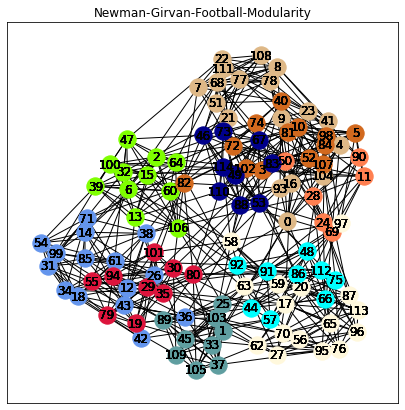

In [ ]:
visualization(nfootball, ng_foot_mod, "Newman-Girvan-Football-Modularity")

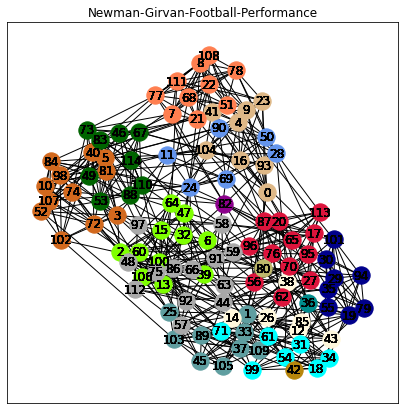

In [ ]:
visualization(nfootball, ng_foot_per, "Newman-Girvan-Football-Performance")

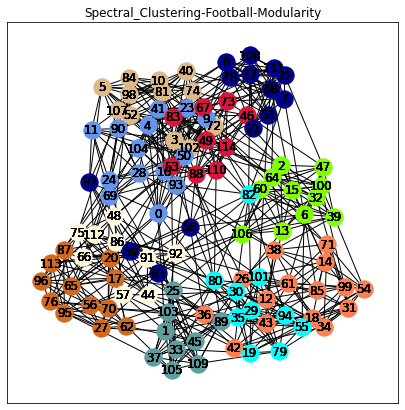

In [ ]:
visualization(nfootball, sc_foot_mod, "Spectral_Clustering-Football-Modularity")

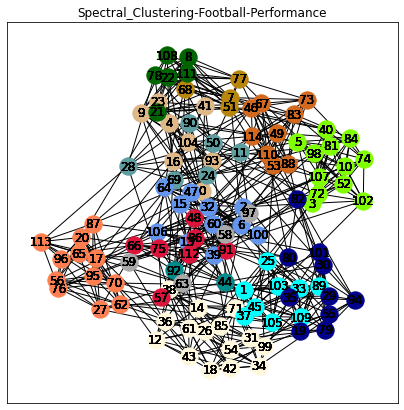

In [ ]:
visualization(nfootball, sc_foot_per, "Spectral_Clustering-Football-Performance")

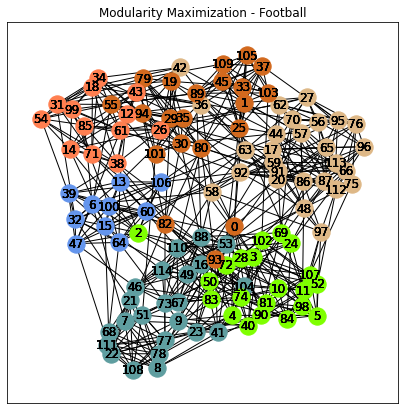

In [ ]:
visualization(nfootball, mm_foot, "Modularity Maximization - Football")

<font color=orange>**Σχολιασμός**</font>

Με βάση τις παραπάνω οπτικοποιήσεις παρατηρούμε ότι σε κάθε περίπτωση οι κοινότητες δεν έχουν κάποια συγκεκριμένη δομή αλλά είναι ελαφρώς συγκεντρωμένες και παρεμβάλλονται η μια της άλλης.

#### Οπτικοποίηση κοινοτήτων Game of Thrones

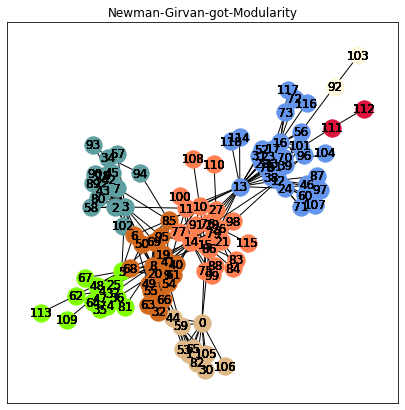

In [ ]:
visualization(ngot, ng_got_mod, "Newman-Girvan-got-Modularity")

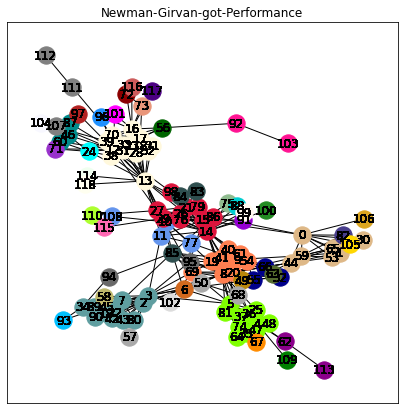

In [ ]:
visualization(ngot, ng_got_per, "Newman-Girvan-got-Performance")

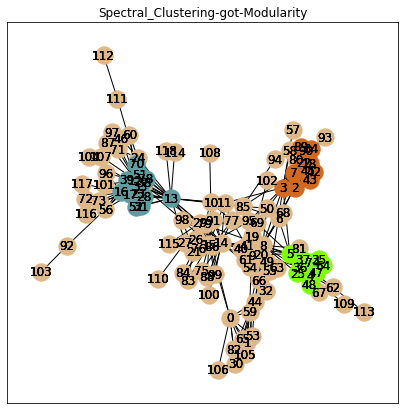

In [ ]:
visualization(ngot, sc_got_mod, "Spectral_Clustering-got-Modularity")

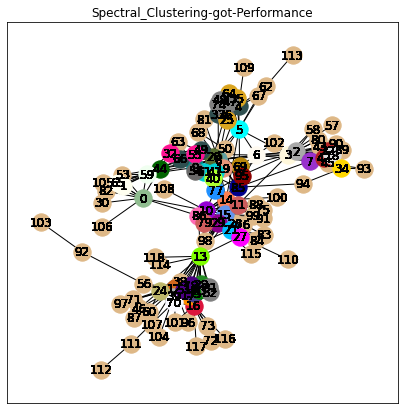

In [ ]:
visualization(ngot, sc_got_per, "Spectral_Clustering-got-Performance")

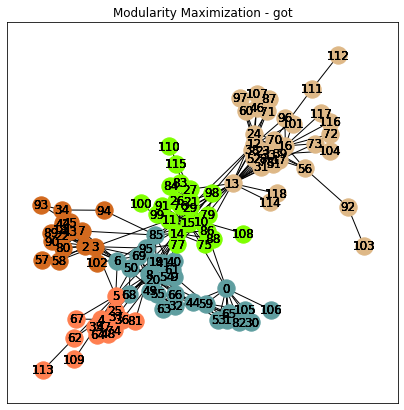

In [ ]:
visualization(ngot, mm_got, "Modularity Maximization - got")

<font color=orange>**Σχολιασμός**</font>

Με βάση τις παραπάνω οπτικοποιήσεις παρατηρούμε ότι είναι πιο διαχωρισμένες οι κοινότητες μέσα στον γράφο (κυρίως στις περιπτώσεις μεγιστοποίησης modularity). Παρατηρούμε ότι στις περιπτώσεις μεγιστοποίησης performance υπάρχουν περισσότερες κοινότητες με λιγότερους κόμβους, ενώ στις περιπτώσεις μεγιστοποίησης του modularity υπάρχουν λιγότερες κοινότητες με περισσότερους κόμβους. Στο modularity maximization έχουμε λίγες κοινότητες με πολλούς κόμβους.

#### Οπτικοποίηση κοινοτήτων email-Eu-core (να οπτικοποιηθεί και η ground-truth διαμέριση)

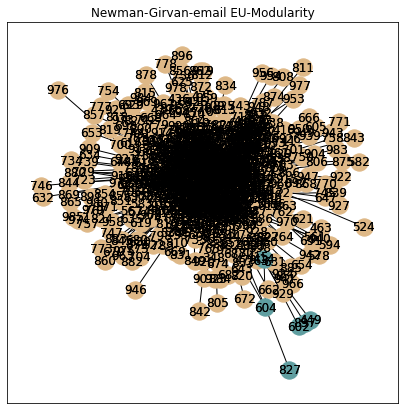

In [ ]:
visualization(neu, ng_eu_mod, "Newman-Girvan-email EU-Modularity")

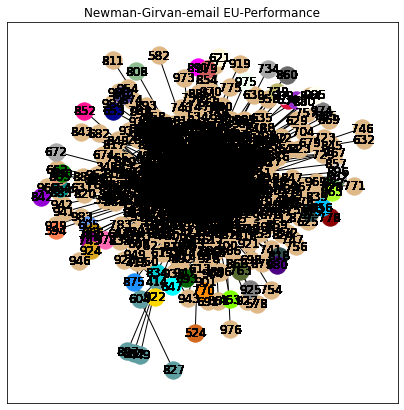

In [ ]:
visualization(neu, ng_eu_per, "Newman-Girvan-email EU-Performance")

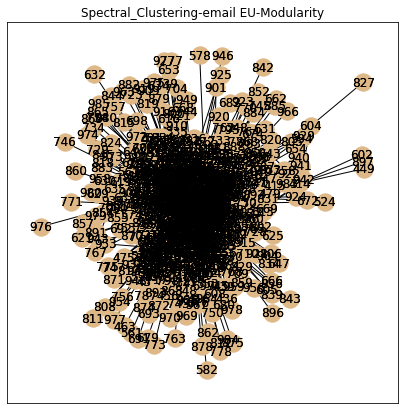

In [ ]:
visualization(neu, sc_eu_mod, "Spectral_Clustering-email EU-Modularity")

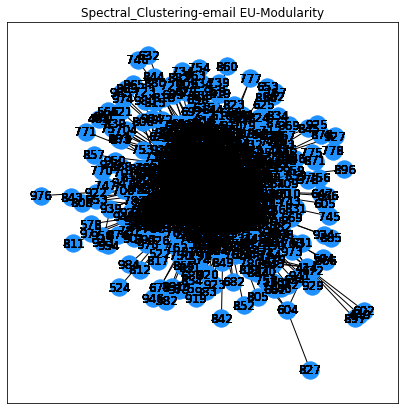

In [ ]:
visualization(neu, sc_eu_per, "Spectral_Clustering-email EU-Modularity")

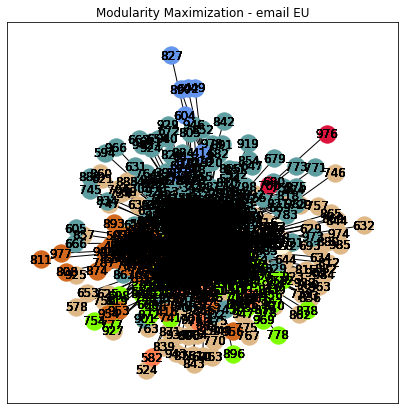

In [ ]:
visualization(neu, mm_eu, "Modularity Maximization - email EU")

<font color=orange>**Σχολιασμός**</font>

Οπτικά για το eu network βλέπουμε ότι οι περισσότερες διαδικασίες έχουν μια μεγάλη κοινότητα με πολλούς κόμβους και μία άλλη πολύ μικρότερη, πέρα από το modular maximization και newman-girvan (μεγιστοποιώντας το performance score) που κάνουν διαχωρισμό σε κοινότητες και βλέπουμε μία κατηγοριοποίηση. Ωστόσο πάλι οι κοινότητες είναι πολύ συγκεχυμένες και δεν έχουν κάποιο διακριτό σχήμα.
Ένα τέτοιο αποτέλεσμα ήταν αναμενόμενο, καθώς η ανταλλαγή emails έχει οδηγήσει σε πολλές συνδέσεις και έχουμε έναν πολύ μεγάλο αριθμό κόμβων.

#### Σύγκριση με τη ground-truth διαμέριση

Σχετικά με το αρχείο email-eu-core-department-labels που μας έχουν δώσει, αυτό μας δείχνει είναι σε ποιά από τις κοινότητες (42 σε αριθμό) ανήκει ο κάθε κόμβος. Προκειμένου να μπορέσουμε να το χρησιμοποιήσουμε χρειάζεται μια προεπεξεργασία. Σε κάθε γραμμή του αρχείου υπάρχουν δύο αριθμοί, ο πρώτος αφορά τον αριθμό του κόμβου και ο δεύτερος τον αριθμό της κοινότητας που ανήκει.

Σαν πρώτο βήμα θα φτιάξουμε μία λίστα από λίστες, όπου κάθε λίστα θα περιέχει τους κόμβους της εκάστοτε κοινότητας, όπως και παραπάνω.

In [ ]:
# create a list of lists for the communities
communities = []
for i in range(42):
    communities.append([])

Στην συνέχεια διαβάζουμε το αρχείο και ταξινομούμε κάθε κόμβο στην κοινότητα του.

In [ ]:
with open('email-Eu-core-department-labels.txt') as f:
    lines = f.readlines()
    #we split each line to get the first and the second number
    graph_node = [int(line.split()[0]) for line in lines]
    community_label = [int(line.split()[1]) for line in lines]

nodes = []
community = []
j = 0

#We use the dict made from conv2int in order to use the mapping
dict_keys = list(eu_map.keys())
dict_values = list(map(int,eu_map.values()))

#we need to keep the nodes that appear on the biggest connected component
for i in range(len(graph_node)):
  if graph_node[i] in dict_values:
    community.append(community_label[i])
    nodes.append(j)
    j = j + 1

for i in range(986):
   communities[community[i]].append(nodes[i])

Οι 42 κοινότητες που δημιουργούνται είναι:

In [ ]:
print("The",  len(communities), "communities are :\n",communities)

The 42 communities are :
 [[122, 130, 148, 149, 156, 157, 178, 179, 180, 191, 214, 231, 257, 262, 277, 278, 284, 289, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 402, 511, 575, 620, 652, 662, 672, 673, 674, 682, 700, 764, 795, 805, 820, 832, 838, 852, 884, 888], [0, 1, 17, 18, 73, 74, 85, 120, 177, 215, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 248, 297, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 341, 414, 415, 449, 459, 468, 479, 516, 517, 602, 604, 628, 643, 647, 686, 687, 720, 729, 748, 758, 780, 827, 833, 853, 885, 886, 897, 983], [134, 340, 482, 521, 553, 554, 582, 597, 750, 843], [77, 78, 79, 445, 483, 497, 531, 539, 557, 580, 792, 829], [14, 53, 65, 93, 95, 129, 133, 167, 168, 172, 176, 183, 197, 198, 199, 200, 201, 202, 203, 206, 207, 232, 256, 270, 275, 276, 280, 290, 291, 292, 294, 399, 401, 403, 413, 419, 425, 426, 440, 450, 457, 458, 464, 484, 486, 493, 515, 522, 523, 526, 534, 542, 543, 544, 556, 562, 563, 567, 568, 572, 574, 576, 583, 5

Για το modularity score και το performance score:

In [ ]:
print("The best modularity of eu-core ground-truth partition is : ",nx.algorithms.community.quality.modularity(neu, communities))
print("The best performance of eu-core ground-truth partition is : ",nx.algorithms.community.quality.partition_quality(neu, communities)[1])

The best modularity of eu-core ground-truth partition is :  0.2880131886237422
The best performance of eu-core ground-truth partition is :  0.9428136036490563


Οπτικοποίηση του ground-truth partition:

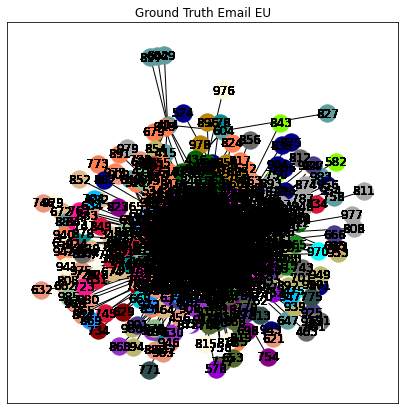

In [ ]:
visualization(neu, communities, "Ground Truth Email EU")

<font color=orange>**Σχολιασμός**</font>

Το **modularity** δεν είναι το βέλτιστο, καθώς η μάθοδος modularity_maximization έδωσε καλύτερο σκορ. Ωστόσο είναι πολύ καλύτερο από τις άλλες μεθόδους που έδωσαν αποτελέσματα κοντά στο μηδέν. Όσον αφορά το **performance** η ground truth διαμέριση έδωσε βελτιωμένο αποτέλεσμα, καθώς το καλύτερο που είχαμε ήταν το 0.708 με το modularity_maximization, ενώ οι άλλοι δύο αλγόριθμοι είχαν δώσει ξανά αρκετά πιο χαμηλά αποτελέσματα.

Φυσικά θεωρούμε ότι καλύτερο αποτέλεσμα δίνει η ground truth διαμέρηση αφού έχει πολύ βελτιωμένα αποτελέσματα και δημιουργεί και περισσότερες κοινότητες, σε σχέση με τις άλλες μεθόδους. Επιπλέον η οποτικοποίηση δείχνει πολύ πιο ξεκάθαρο διαχωρισμό σε κοινότητες, απ'ότι είχαμε στους παραπάνω αλγορίθμους.

#### Οπτικοποίηση κοινοτήτων REG

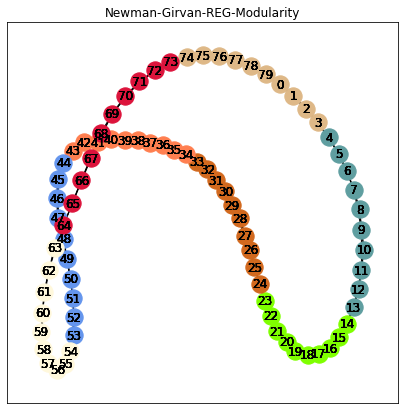

In [ ]:
visualization(REG, ng_reg_mod, "Newman-Girvan-REG-Modularity")

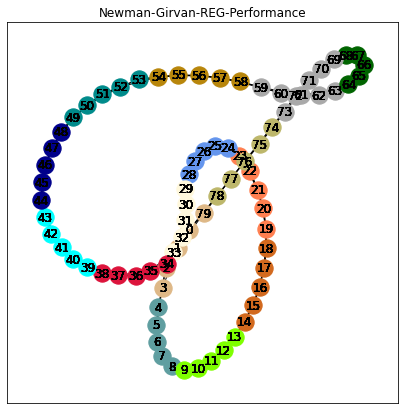

In [ ]:
visualization(REG, ng_reg_per, "Newman-Girvan-REG-Performance")

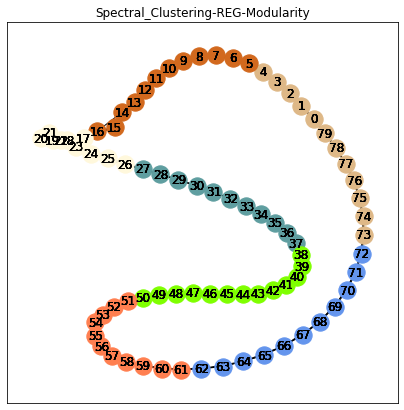

In [ ]:
visualization(REG, sc_reg_mod, "Spectral_Clustering-REG-Modularity")

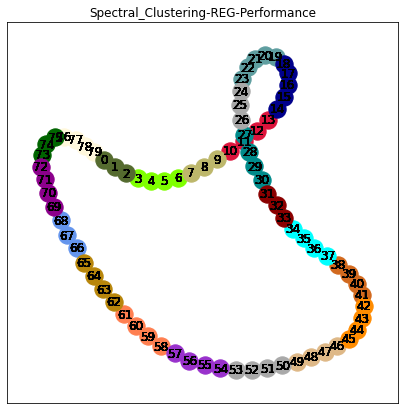

In [ ]:
visualization(REG, sc_reg_per, "Spectral_Clustering-REG-Performance")

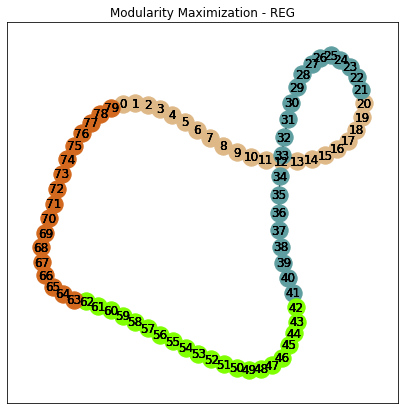

In [ ]:
visualization(REG, mm_reg, "Modularity Maximization - REG")

<font color=orange>**Σχολιασμός**</font>

Στην περίπτωση του γράφου REG βλέπουμε ότι σε κάθε περίπτωση ο γράφος χωρίζεται σε κοινότητες με σχεδόν ίδιο πλήθος κόμβων, κάτι το οποίο αναμέναμε αφού κάθε κόμβος συνδέεται με δύο γειτονικούς κόμβους.

#### Οπτικοποίηση κοινοτήτων RGER

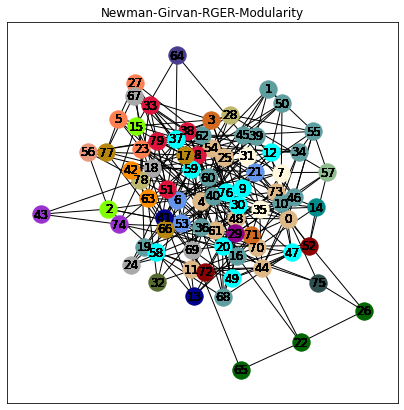

In [ ]:
visualization(RGER, ng_rger_mod, "Newman-Girvan-RGER-Modularity")

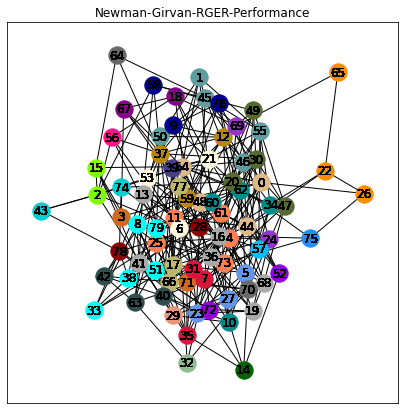

In [ ]:
visualization(RGER, ng_rger_per, "Newman-Girvan-RGER-Performance")

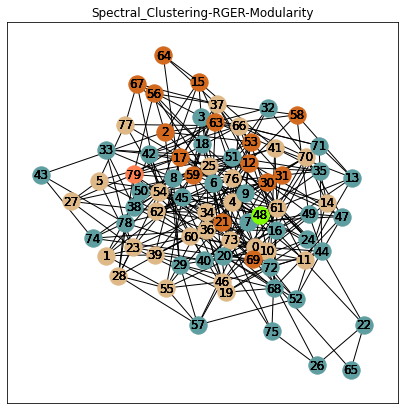

In [ ]:
visualization(RGER, sc_rger_mod, "Spectral_Clustering-RGER-Modularity")

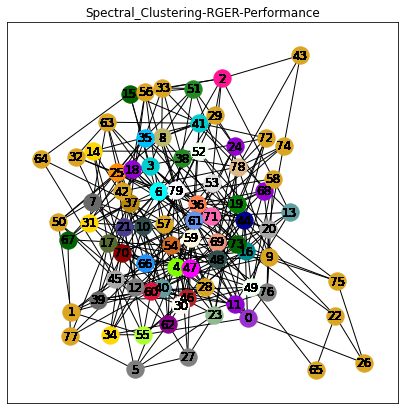

In [ ]:
visualization(RGER, sc_rger_per, "Spectral_Clustering-RGER-Performance")

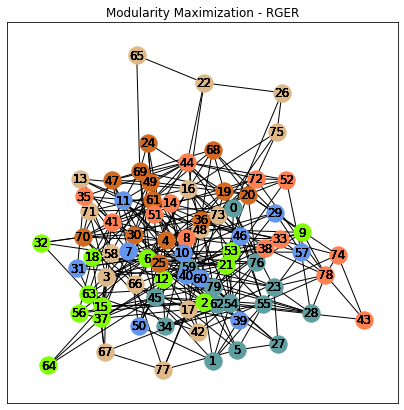

In [ ]:
visualization(RGER, mm_rger, "Modularity Maximization - RGER")

<font color=orange>**Σχολιασμός**</font>

Για τον RGER γράφο βλέοουμε ότι οι κοινότητες δεν έχουν κάποιο σχεδιασμό. Αυτό είναι λογικό λόγω της τυχαιότητας του.

#### Οπτικοποίηση κοινοτήτων RGG

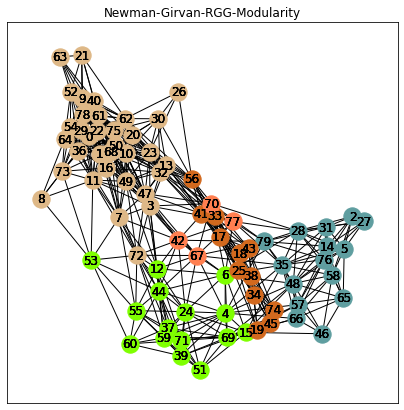

In [ ]:
visualization(RGG, ng_rgg_mod, "Newman-Girvan-RGG-Modularity")

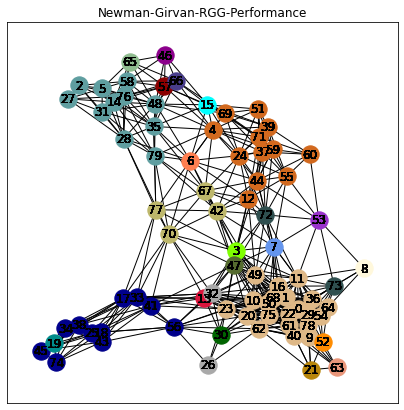

In [ ]:
visualization(RGG, ng_rgg_per, "Newman-Girvan-RGG-Performance")

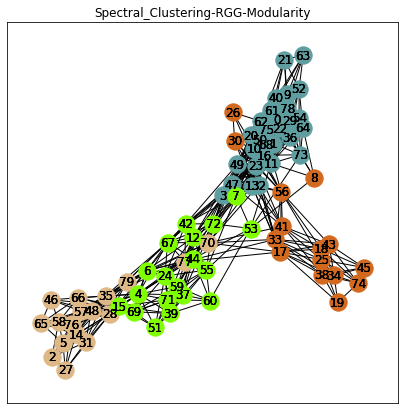

In [ ]:
visualization(RGG, sc_rgg_mod, "Spectral_Clustering-RGG-Modularity")

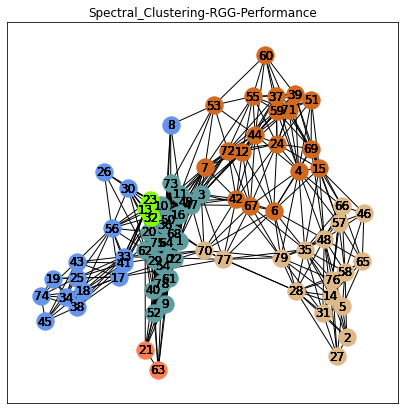

In [ ]:
visualization(RGG, sc_rgg_per, "Spectral_Clustering-RGG-Performance")

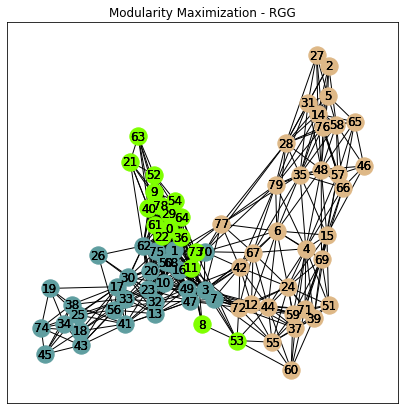

In [ ]:
visualization(RGG, mm_rgg, "Modularity Maximization - RGG")

<font color=orange>**Σχολιασμός**</font>

Όσον αφορά τον RGG γράφο παρατηρούμε διαισθητικά ότι δημιουργούνται κοινότητεες γύρω από κάθε κόμβο με βάσει τις αποστάσεις του κόμβου από τους υπόλοιπους στο δίκτυο. Αυτό οφείλεται στον τρόπο δημιουργίας του γράφου όπου δύο κόμβοι συνδέονται αν η απόσταση μεταξύ τους είναι μικρότερη ή ίση της ακτίνας του.

#### Οπτικοποίηση κοινοτήτων SW

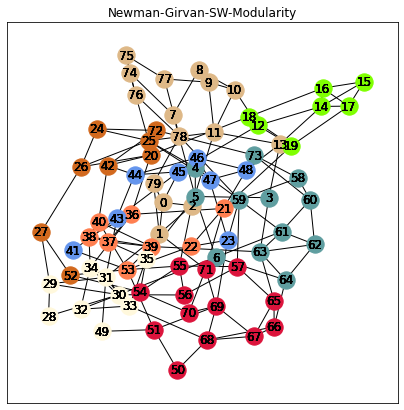

In [ ]:
visualization(SW, ng_sw_mod, "Newman-Girvan-SW-Modularity")

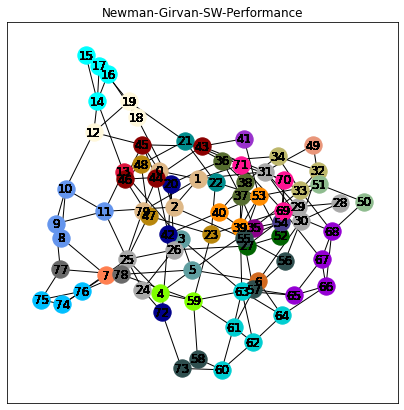

In [ ]:
visualization(SW, ng_sw_per, "Newman-Girvan-SW-Performance")

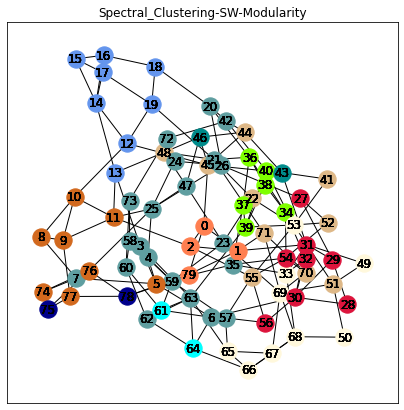

In [ ]:
visualization(SW, sc_sw_mod, "Spectral_Clustering-SW-Modularity")

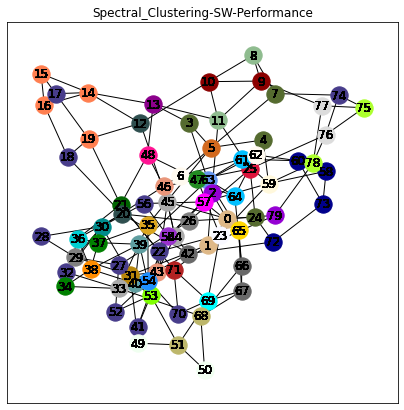

In [ ]:
visualization(SW, sc_sw_per, "Spectral_Clustering-SW-Performance")

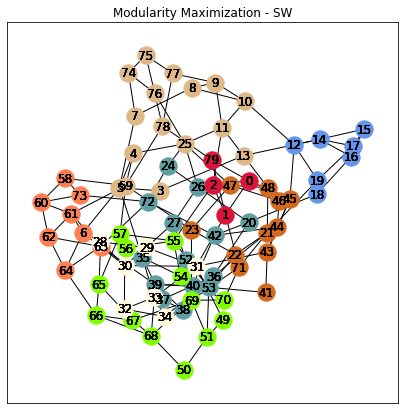

In [ ]:
visualization(SW, mm_sw, "Modularity Maximization - SW")

<font color=orange>**Σχολιασμός**</font>

Αναφορικά με το δίκτυο SW, βλέπουμε ότι ειδικά στις περιπτώσεις μεγιστοποίησης του modularity score (και στο modularity maximization) οι κοινότητες διακρίνονται πιο εύκολα, ενώ στις περιπτώσεις μεγιστοποίησης του performance score οι κοινότητες είναι πιο συγκεχυμένες.

#### Οπτικοποίηση κοινοτήτων SF

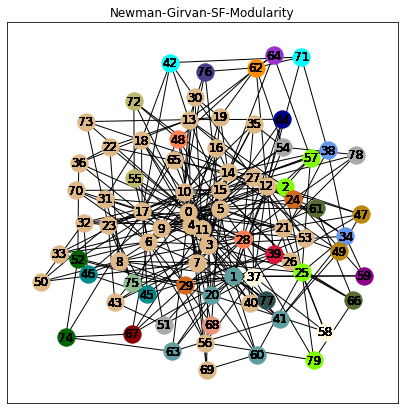

In [ ]:
visualization(SF, ng_sf_mod, "Newman-Girvan-SF-Modularity")

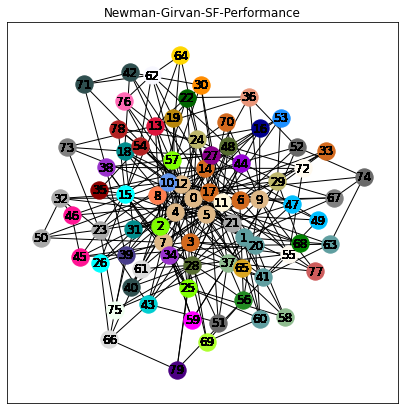

In [ ]:
visualization(SF, ng_sf_per, "Newman-Girvan-SF-Performance")

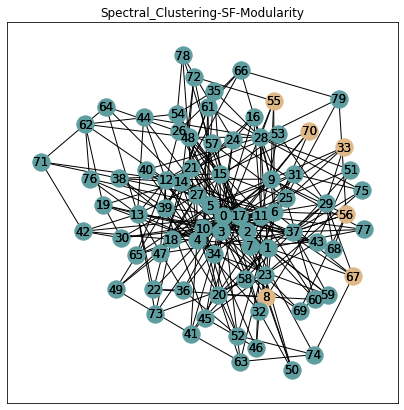

In [ ]:
visualization(SF, sc_sf_mod, "Spectral_Clustering-SF-Modularity")

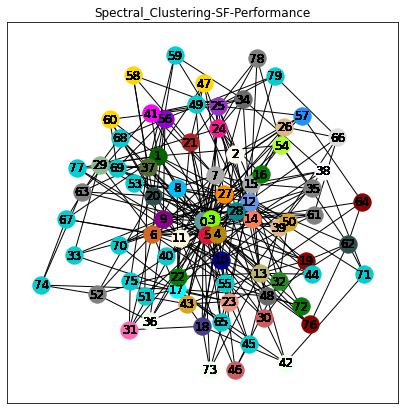

In [ ]:
visualization(SF, sc_sf_per, "Spectral_Clustering-SF-Performance")

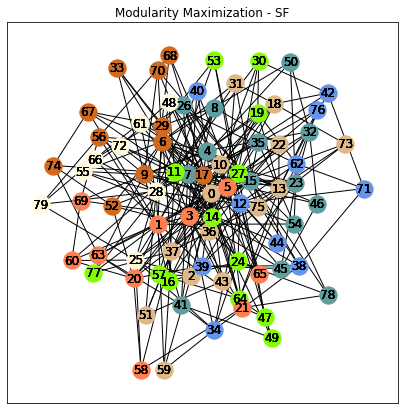

In [ ]:
visualization(SF, mm_sf, "Modularity Maximization - SF")

<font color=orange>**Σχολιασμός**</font>

Οπτικά για τον SF γράφο, τα αποτελέσματα δεν είναι εύκολο να παρατηρηθούν και να εξάγουμε συμπεράσματα γιατί οι κοινότητες δεν έχουν συγκεκριμένη δομή, εκτός απο την περίπτωση του modularity με την spectral clustering μέθοδο που έχουμε δύο κοινότητες, μία με την μέγιστη πλειοψηφία των κόμβων και άλλη μια με πολύ λίγους κόμβους.